In [141]:
import pandas as pd
import os 
dirs = os.getcwd() 
files = os.listdir(dirs) 
files

['0ca_after_e.xlsx',
 '0ca_before_e.xlsx',
 '0descriptive 3 eu.pdf',
 '0descriptive 3 eu.xlsx',
 '0gs_after_e.xlsx',
 '0gs_before_e.xlsx',
 '0g_after_e.xlsx',
 '0g_before_e.xlsx',
 '0p_after_e.xlsx',
 '0p_before_e.xlsx',
 '0se_after_e.xlsx',
 '0se_before_e.xlsx',
 '0s_after_e.xlsx',
 '0s_before_e.xlsx',
 '0_all copy 2.ipynb',
 '0_all copy 3.ipynb',
 '0_all copy 4.ipynb',
 '0_all copy 5.ipynb',
 '0_all copy 6.ipynb',
 '0_all copy.ipynb',
 '0_all.zip',
 '0_ca.ipynb',
 '0_goods_service.ipynb',
 '0_service.ipynb',
 '1_all 3.docx',
 '1_all 4.docx',
 'all_data',
 'all_data_total_EU_export_of_Goods_eu_GDP_1.csv',
 'all_data_total_EU_export_of_goods_service_eu_GDP_1.csv',
 'all_data_total_EU_export_of_Service_eu_GDP_1.csv',
 'all_data_total_EU_GDP_CA_1.csv',
 'all_data_total_EU_primary_income_eu_GDP_1.csv',
 'all_data_total_EU_secondary_income_eu_GDP_1.csv',
 'ca.xlsx',
 'ca_after.xlsx',
 'ca_before.xlsx',
 'ca_before_e.xlsx',
 'data',
 'descriptive 2.pdf',
 'descriptive 2.xlsx',
 'descriptive

In [142]:
# Sources
# https://matheusfacure.github.io/python-causality-handbook/15-Synthetic-Control.html
# https://nbviewer.jupyter.org/github/OscarEngelbrektson/SyntheticControlMethods/blob/master/examples/user_guide.ipynb

In [143]:
import warnings
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import os 
from typing import List
from operator import add
from toolz import reduce, partial
from scipy import stats
from scipy.optimize import fmin_slsqp
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from matplotlib import style
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_columns", 6)
style.use("fivethirtyeight")

# read data file
# pandas read_csv

dirs = os.getcwd() 
files = os.listdir(dirs) 

data_c = pd.read_csv('all_data_total_EU_GDP_CA_1.csv') 
data_c = data_c.loc[data_c.year >= 2006]
raw_data_c = copy.deepcopy(data_c)# Copy dataframe

data_g = pd.read_csv('all_data_total_EU_export_of_Goods_eu_GDP_1.csv') 
data_g = data_g.loc[data_g.year >= 2006]
raw_data_g = copy.deepcopy(data_g)# Copy dataframe

data_s = pd.read_csv('all_data_total_EU_export_of_Service_eu_GDP_1.csv') 
data_s = data_s.loc[data_s.year >= 2006]
raw_data_s = copy.deepcopy(data_s)# Copy dataframe

data_g_s = pd.read_csv('all_data_total_EU_export_of_goods_service_eu_GDP_1.csv') 
data_g_s = data_g_s.loc[data_g_s.year >= 2006]
raw_data_g_s = copy.deepcopy(data_g_s)# Copy dataframe

data_primary = pd.read_csv('all_data_total_EU_primary_income_eu_GDP_1.csv') 
data_primary = data_primary.loc[data_primary.year >= 2006]
raw_data_primary = copy.deepcopy(data_primary)# Copy dataframe

data_secondary = pd.read_csv('all_data_total_EU_secondary_income_eu_GDP_1.csv') 
data_secondary = data_secondary.loc[data_secondary.year >= 2006]
raw_data_secondary = copy.deepcopy(data_secondary)# Copy dataframe



In [144]:
# Divide data by the year 2016 to check descriptive statistics

# raw_data_c.describe().loc[raw_data_c.country == 'EU'].to_excel('1ca.xlsx')
# raw_data_c.loc[raw_data_c.year <= 2016].loc[raw_data_c.country == 'EU'].describe().to_excel('1ca_before_e.xlsx')
# raw_data_c.loc[raw_data_c.year >  2016].loc[raw_data_c.country == 'EU'].describe().to_excel('1ca_after_e.xlsx')

# raw_data_g.describe().loc[raw_data_g.country == 'EU'].to_excel('1goods.xlsx')
# raw_data_g.loc[raw_data_g.year <= 2016].loc[raw_data_g.country == 'EU'].describe().to_excel('1g_before_e.xlsx')
# raw_data_g.loc[raw_data_g.year >  2016].loc[raw_data_g.country == 'EU'].describe().to_excel('1g_after_e.xlsx')

# raw_data_s.describe().loc[raw_data_s.country == 'EU'].to_excel('0service.xlsx')
# raw_data_s.loc[raw_data_s.year <= 2016].loc[raw_data_s.country == 'EU'].describe().to_excel('1s_before_e.xlsx')
# raw_data_s.loc[raw_data_s.year >  2016].loc[raw_data_s.country == 'EU'].describe().to_excel('1s_after_e.xlsx')

# raw_data_g_s.describe().loc[raw_data_g_s.country == 'EU'].to_excel('0gs.xlsx')
# raw_data_g_s.loc[raw_data_g_s.year <= 2016].loc[raw_data_g_s.country == 'EU'].describe().to_excel('1gs_before_e.xlsx')
# raw_data_g_s.loc[raw_data_g_s.year >  2016].loc[raw_data_g_s.country == 'EU'].describe().to_excel('1gs_after_e.xlsx')


# raw_data_primary.describe().loc[raw_data_primary.country == 'EU'].to_excel('0primary.xlsx')
# raw_data_primary.loc[raw_data_primary.year <= 2016].loc[raw_data_primary.country == 'EU'].describe().to_excel('1p_before_e.xlsx')
# raw_data_primary.loc[raw_data_primary.year >  2016].loc[raw_data_primary.country == 'EU'].describe().to_excel('1p_after_e.xlsx')

# raw_data_secondary.describe().loc[raw_data_primary.country == 'EU'].to_excel('0secondary.xlsx')
# raw_data_secondary.loc[raw_data_secondary.year <= 2016].loc[raw_data_primary.country == 'EU'].describe().to_excel('1se_before_e.xlsx')
# raw_data_secondary.loc[raw_data_secondary.year >  2016].loc[raw_data_primary.country == 'EU'].describe().to_excel('1se_after_e.xlsx')

In [145]:
display(data_g)

country  year  Export of goods  ...  education  unemployment rate  \
0    Brazil  2006              913  ...   9.912729           8.640000   
1    Brazil  2007             1114  ...   9.912729           8.330000   
2    Brazil  2008             1677  ...   9.912729           7.340000   
3    Brazil  2009             1759  ...   9.912729           8.520000   
4    Brazil  2010             2169  ...   8.328785           7.740000   
..      ...   ...              ...  ...        ...                ...   
130      EU  2016           142309  ...   1.130620           9.150000   
131      EU  2017           163629  ...   1.130620           8.158334   
132      EU  2018           172968  ...   1.130620           7.283333   
133      EU  2019           170578  ...   1.130620           6.716667   
134      EU  2020           144702  ...   0.913340           7.150000   

     GDP growth rate  
0          11.042234  
1          12.918339  
2          14.265880  
3           7.168936  
4          16.647691  
..               ...  
130         2.100000  
131         2.800000  
132         2.100000  
133         1.600000  
134        -6.100000  

[135 rows x 7 columns]

In [146]:
display(data_s)

country  year  Export of service  ...  education  unemployment rate  \
0    Brazil  2006                582  ...   9.912729           8.640000   
1    Brazil  2007                548  ...   9.912729           8.330000   
2    Brazil  2008                876  ...   9.912729           7.340000   
3    Brazil  2009                811  ...   9.912729           8.520000   
4    Brazil  2010               1109  ...   8.328785           7.740000   
..      ...   ...                ...  ...        ...                ...   
130      EU  2016             103311  ...   1.130620           9.150000   
131      EU  2017             114367  ...   1.130620           8.158334   
132      EU  2018             125287  ...   1.130620           7.283333   
133      EU  2019             120622  ...   1.130620           6.716667   
134      EU  2020              98510  ...   0.913340           7.150000   

     GDP growth rate  
0          11.042234  
1          12.918339  
2          14.265880  
3           7.168936  
4          16.647691  
..               ...  
130         2.100000  
131         2.800000  
132         2.100000  
133         1.600000  
134        -6.100000  

[135 rows x 7 columns]

In [147]:
display(data_g_s)

country  year  Total exports of goods and services  ...  education  \
0    Brazil  2006                                 1495  ...   9.912729   
1    Brazil  2007                                 1662  ...   9.912729   
2    Brazil  2008                                 2553  ...   9.912729   
3    Brazil  2009                                 2570  ...   9.912729   
4    Brazil  2010                                 3278  ...   8.328785   
..      ...   ...                                  ...  ...        ...   
130      EU  2016                               245620  ...   1.130620   
131      EU  2017                               277996  ...   1.130620   
132      EU  2018                               298255  ...   1.130620   
133      EU  2019                               291200  ...   1.130620   
134      EU  2020                               243212  ...   0.913340   

     unemployment rate  GDP growth rate  
0             8.640000        11.042234  
1             8.330000        12.918339  
2             7.340000        14.265880  
3             8.520000         7.168936  
4             7.740000        16.647691  
..                 ...              ...  
130           9.150000         2.100000  
131           8.158334         2.800000  
132           7.283333         2.100000  
133           6.716667         1.600000  
134           7.150000        -6.100000  

[135 rows x 7 columns]

In [148]:
display(data_primary)

country  year  Primary income  ...  education  unemployment rate  \
0    Brazil  2006             999  ...   9.912729           8.640000   
1    Brazil  2007            1425  ...   9.912729           8.330000   
2    Brazil  2008            1150  ...   9.912729           7.340000   
3    Brazil  2009            1409  ...   9.912729           8.520000   
4    Brazil  2010            2162  ...   8.328785           7.740000   
..      ...   ...             ...  ...        ...                ...   
130      EU  2016           55619  ...   1.130620           9.150000   
131      EU  2017           68304  ...   1.130620           8.158334   
132      EU  2018           77832  ...   1.130620           7.283333   
133      EU  2019           77993  ...   1.130620           6.716667   
134      EU  2020           59780  ...   0.913340           7.150000   

     GDP growth rate  
0          11.042234  
1          12.918339  
2          14.265880  
3           7.168936  
4          16.647691  
..               ...  
130         2.100000  
131         2.800000  
132         2.100000  
133         1.600000  
134        -6.100000  

[135 rows x 7 columns]

In [149]:
display(data_secondary)

country  year  Secondary income  ...  education  unemployment rate  \
0    Brazil  2006               999  ...   9.912729           8.640000   
1    Brazil  2007              1425  ...   9.912729           8.330000   
2    Brazil  2008              1150  ...   9.912729           7.340000   
3    Brazil  2009              1409  ...   9.912729           8.520000   
4    Brazil  2010              2162  ...   8.328785           7.740000   
..      ...   ...               ...  ...        ...                ...   
130      EU  2016              4599  ...   1.130620           9.150000   
131      EU  2017              4597  ...   1.130620           8.158334   
132      EU  2018              4675  ...   1.130620           7.283333   
133      EU  2019              5169  ...   1.130620           6.716667   
134      EU  2020              4675  ...   0.913340           7.150000   

     GDP growth rate  
0          11.042234  
1          12.918339  
2          14.265880  
3           7.168936  
4          16.647691  
..               ...  
130         2.100000  
131         2.800000  
132         2.100000  
133         1.600000  
134        -6.100000  

[135 rows x 7 columns]

In [150]:
# Standardize independent variables
# mean 0 / variance 1

data_c[['inflation','education','unemployment rate','GDP growth rate']] = StandardScaler().fit_transform(data_c[['inflation','education','unemployment rate','GDP growth rate']])

data_g[['inflation','education','unemployment rate','GDP growth rate']] = StandardScaler().fit_transform(data_g [['inflation','education','unemployment rate','GDP growth rate']])

data_g[['inflation','education','unemployment rate','GDP growth rate']] = StandardScaler().fit_transform(data_g_s[['inflation','education','unemployment rate','GDP growth rate']])

data_primary[['inflation','education','unemployment rate','GDP growth rate']] = StandardScaler().fit_transform(data_primary[['inflation','education','unemployment rate','GDP growth rate']])

data_secondary[['inflation','education','unemployment rate','GDP growth rate']] = StandardScaler().fit_transform(data_secondary[['inflation','education','unemployment rate','GDP growth rate']])



## 1.Raw data

In [151]:
def visulaize_origianl(country,interested_variable, data0):
  """
  Make graph with interested variable and country
  This function is to visulize the raw data 
  """

  # Make data0set that is only about entered country 
  str_expr = f"country == '{country}' " 
  data0_new = data0.query(str_expr) 

  plt.figure(figsize=(10,5)) 
  plt.plot(data0['year'],data0[interested_variable],marker="o",alpha=.6, label = f'{interested_variable} with Non {country}',color='dimgray')
  plt.plot(data0_new['year'],data0_new[interested_variable],label = f'{interested_variable} with {country}',color='black')   
  plt.vlines(x=2016,   ymin=-200000, ymax=200000, linestyle=":", lw=2, label="Brexit")
  plt.gray()
  plt.legend();  
  plt.show()


# 2. Synthetic control method

In [152]:
def X_y(country, main_variable, data0):
  """
   Get X and y
  """

  features = [ 'inflation',"education",'unemployment rate','GDP growth rate']

  #Make new dummy variable 'Brexit'
  data0['Brexit'] = [1 if t else 0 for t in list(data0['year'] > 2016.0)]

  # make data only about selected country
  str_expr = f"country == '{country}' "   
  data0_country = data0.query(str_expr) 

  # .T  flip the table to have one column per state
  inverted = data0.query("Brexit == 0").pivot(index='country', columns="year")[features].T
  
  # Replace the missing value
  inverted = inverted.fillna(method='pad')
  
  # Set X and y
  y = inverted[country].values
  X = inverted.drop(columns= country).values

  return X,y

def loss_w(W, X, y) -> float:
    return np.sqrt(np.mean((y - X.dot(W))**2))

def get_w(X, y):
    w_start = [1/X.shape[1]]*X.shape[1]

    weights = fmin_slsqp(partial(loss_w, X=X, y=y),
                         np.array(w_start),
                         f_eqcons=lambda x: np.sum(x) - 1,
                         bounds=[(0.0, 1.0)]*len(w_start),
                         disp=False)
    return weights

def sythetic_weight(country, interested_variable, data0):   
  """
  Get the weight of synthetic control.
  """

  data_weights = get_w(X_y(country, interested_variable, data0)[0], X_y(country, interested_variable, data0)[1])
  print("Sum of weight:", data_weights.sum())

  return np.round(data_weights, 4)

def synthetic_control(country, main_variable, data0):
  """
  This function is to generate the value of Synthetic Control

  Country : The country you want to see
  pool: list of country in data set
  main_variable: Variable you want to see. ex) CA
  data0 : data that you have
  
  """

  #Make new dummy variable 'Brexit'
  data0['Brexit'] = [1 if t else 0 for t in list(data0['year'] > 2016.0)]

  # make data only about selected country
  str_expr = f"country == '{country}' "   
  data0_country = data0.query(str_expr) 

  # .T  flip the table to have one column per state
  features = [main_variable,'unemployment rate', "education",'inflation','GDP growth rate']
  inverted = data0.query("Brexit == 0").pivot(index='country', columns="year")[features].T
  
  # Replace the missing value
  inverted = inverted.fillna(method='pad')
  
  # Set X and y
  y = inverted[country].values
  X = inverted.drop(columns= country).values
  
  # Find the synthetic controls of countries in the pool or a given dataset
  weights_synth = sythetic_weight(country, main_variable, data0)
  weights_synth.round(3)

  #select countries without country and make tables about main variable entered
  data1 = data0.query(f"country != '{country}' ").pivot(index='year', columns="country")[main_variable]

  # multiply values of main variable with weight that we have gotten
  data_synth_lr = data1.values.dot(weights_synth)

  data0_country['Synthetic'] = data_synth_lr

  return data0_country


def synthetic_control_dataframe(country, main_variable, data0):
 
  """
  This function is to make dataframe that contain the value of Synthetic Control

  Country : The country you want to see
  pool: list of country in data set
  main_variable: Variable you want to see. ex) CA
  data0 : data that you have
  """

  # Deepcopy dataframe
  data1 = copy.deepcopy(data0)

  # Make dataframe that contain values of augmented synthetic control
  data2 = synthetic_control(country, main_variable, data1)

  # Add column of difference
  data2[f'Difference'] = data2[main_variable]- data2['Synthetic']

  # Make dataframe that contain pre-treatment period only
  data_pre = data2.loc[data2.year <= 2016]

  # Make dataframe that contain post-treatment period only
  data_post = data2.loc[data2.year > 2016]

  # Calculate RMSPE for pre-treatment period only
  rmspe = rmse(data_pre[main_variable], data_pre['Synthetic'])
  print('Pre- RMSPE :', rmspe )

  # Calculate RMSPE for post-treatment period only
  rmspe = rmse(data_post[main_variable], data_post['Synthetic'])
  print('Post- RMSPE :', rmspe )

  return data2[['country','year',main_variable,'Synthetic','Difference']]

def synthetic_plot(country,main_variable, data0):
  """
  Show the plot of synthetic control
  """
  features = [main_variable]
  data_synth_1 = data0.query(f"country != '{country}' ").pivot(index='year', columns="country")[features].values.dot(sythetic_weight(country, 'CA', data0))
  
  plt.figure(figsize=(10,6))
  plt.plot(data0.query(f"country == '{country}'")["year"], data0.query(f"country == '{country}'")[features], label=f"{country}",color='dimgray')
  plt.plot(data0.query(f"country == '{country}'")["year"], data_synth_1, label="Synthetic Control",color='black')
  plt.vlines(x=2016, ymin=-200000, ymax=200000, linestyle=":", lw=2, label="Brexit")
  plt.ylabel(f"{main_variable} ")
  plt.legend();

def synthetic_plot_magnified(country,main_variable, data0):
  """
  Show the plot of synthetic control with samll values of main_variable
  """
  features = [main_variable]
  data_synth_1 = data0.query(f"country != '{country}' ").pivot(index='year', columns="country")[features].values.dot(sythetic_weight(country, 'CA', data0))
  
  plt.figure(figsize=(10,6))
  plt.plot(data0.query(f"country == '{country}'")["year"], data0.query(f"country == '{country}'")[features], label=f"{country}",color='dimgray')
  plt.plot(data0.query(f"country == '{country}'")["year"], data_synth_1, label="Synthetic Control",color='black')
  plt.vlines(x=2016, ymin=-5000, ymax=5000, linestyle=":", lw=2, label="Brexit")
  plt.ylabel(f"{main_variable} ")
  plt.legend();


## 3. Agumented Synthetic Control Method

In [153]:

def agumented_synthetic_control(country, main_variable, data0):
  """
  This function is to make dataframe that contain the value of ASCM

  Country : The country you want to see
  pool: list of country in data set
  main_variable: Variable you want to see. ex) CA
  data0 : data that you have
  
  """

  #Make new dummy variable 'Brexit'
  data0['Brexit'] = [1 if t else 0 for t in list(data0['year'] > 2016.0)]

  # make data only about selected country
  str_expr = f"country == '{country}' "   
  data0_country = data0.query(str_expr) 

  # .T  flip the table to have one column per state
  features = [main_variable,'unemployment rate', "education",'inflation','GDP growth rate']
  inverted = data0.query("Brexit == 0").pivot(index='country', columns="year")[features].T
  
  # Replace the missing value
  inverted = inverted.fillna(method='pad')
  
  # Set X and y
  y = inverted[country].values
  X = inverted.drop(columns= country).values
  
  # Find the weight of countries in the pool or a given dataset
  weights_ridge = Ridge(fit_intercept=False).fit(X, y).coef_
  weights_ridge.round(3)

  #select countries without country and make tables about main variable entered
  data1 = data0.query(f"country != '{country}' ").pivot(index='year', columns="country")[main_variable]

  # multiply values of main variable with weight that we have gotten
  data_synth_lr = data1.values.dot(weights_ridge)

  data0_country['ASCM'] = data_synth_lr

  return data0_country

def rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))

    return loss

def agumented_synthetic_control_dataframe(country, main_variable, data0):

  # Deepcopy dataframe
  data1 = copy.deepcopy(data0)

  # Make dataframe that contain values of augmented synthetic control
  data2 = agumented_synthetic_control(country, main_variable, data1)

  # Add column of difference
  data2['Difference'] = data2[main_variable]- data2['ASCM']

  # Make dataframe that contain pre-treatment period only
  data_pre = data2.loc[data2.year <= 2016]

  # Make dataframe that contain post-treatment period only
  data_post = data2.loc[data2.year > 2016]

  # Calculate RMSPE for pre-treatment period only
  rmspe = rmse(data_pre[main_variable], data_pre['ASCM'])
  print('Pre- RMSPE :', rmspe )

  # Calculate RMSPE for post-treatment period only
  rmspe = rmse(data_post[main_variable], data_post['ASCM'])
  print('Post- RMSPE :', rmspe )

  return data2[['country','year',main_variable,'ASCM','Difference']]


# Country : The country you want to see
# main_variable: Variable you want to see. ex) CA
# data0 : data that you have

def agumented_weight_visualize(country, main_variable, data0):
  """
  This function is for showing the weight of countries from ridge ASMC

  # Country : The country you want to see
  # main_variable: Variable you want to see. ex) CA
  # data0 : data that you have
  
  """

  #Make new dummy variable 'Brexit'
  data0['Brexit'] = [1 if t else 0 for t in list(data0['year'] > 2016.0)]

  # make data only about selected country
  str_expr = f"country == '{country}' "   
  data0_country = data0.query(str_expr) 

  # .T  flip the table to have one column per state
  features = [main_variable,'unemployment rate', "education",'inflation','GDP growth rate']
  inverted = data0.query("Brexit == 0").pivot(index='country', columns="year")[features].T
  
  # Replace the missing value
  inverted = inverted.fillna(method='pad')
  
  # Set X and y
  y = inverted[country].values
  X = inverted.drop(columns= country).values
  
  # Find the weight of countries in the pool or a given dataset
  weights_ridge = Ridge(fit_intercept=False).fit(X, y).coef_
  weights_ridge_rounded = weights_ridge.round(3)

  # Show weight of countries in the pool
  pool = list(data0['country'].unique())

  dic = {}
  for index in range(len(pool)-1):
    dic[pool[index]] = weights_ridge_rounded[index]
  return dic

# Country : The country you want to see
# pool: list of country in data set
# main_variable: Variable you want to see. ex) CA
# data0 : data that you have

def agumented_synthetic_control_visualize(country, main_variable, data0):

  #Make new dummy variable 'Brexit'
  data0['Brexit'] = [1 if t else 0 for t in list(data0['year'] > 2016.0)]

  # make data only about selected country
  str_expr = f"country == '{country}' "   
  data0_country = data0.query(str_expr) 

  # .T  flip the table to have one column per state
  features = [main_variable,'unemployment rate', "education",'inflation','GDP growth rate']
  inverted = data0.query("Brexit == 0").pivot(index='country', columns="year")[features].T
  
  # Replace the missing value
  inverted = inverted.fillna(method='pad')
  
  # Set X and y
  y = inverted[country].values
  X = inverted.drop(columns= country).values
  
  # Find the weight of countries in the pool or a given dataset/ Calculate the weight through Ridge regression.
  weights_ridge = Ridge(fit_intercept=False).fit(X, y).coef_
  
  # Show weight of countries in the pool
  pool = list(data0['country'].unique())

  #select countries without country and make tables about main variable entered
  data1 = data0.query(f"country != '{country}' ").pivot(index='year', columns="country")[main_variable]

  # multiply values of main variable with weight that we have gotten
  data_synth_lr = data1.values.dot(weights_ridge)

  plt.figure(figsize=(10,6))
  plt.plot(data0.query(f"country == '{country}'")["year"], data0.query(f"country == '{country}'")[main_variable], label=f"{country}",color='dimgray')
  plt.plot(data0.query(f"country == '{country}'")["year"], data_synth_lr, label="Augmented Synthetic Control",color='black')
  plt.vlines(x=2016,  ymin=-200000, ymax=200000, linestyle=":", lw=2, label="Brexit")
  plt.ylabel(f"{main_variable}")
  plt.legend();

def agumented_synthetic_control_visualize_magnified(country, main_variable, data0):

  #Make new dummy variable 'Brexit'
  data0['Brexit'] = [1 if t else 0 for t in list(data0['year'] > 2016.0)]

  # make data only about selected country
  str_expr = f"country == '{country}' "   
  data0_country = data0.query(str_expr) 

  # .T  flip the table to have one column per state
  features = [main_variable,'unemployment rate', "education",'inflation','GDP growth rate']
  inverted = data0.query("Brexit == 0").pivot(index='country', columns="year")[features].T
  
  # Replace the missing value
  inverted = inverted.fillna(method='pad')
  
  # Set X and y
  y = inverted[country].values
  X = inverted.drop(columns= country).values
  
  # Find the weight of countries in the pool or a given dataset/ Calculate the weight through Ridge regression.
  weights_ridge = Ridge(fit_intercept=False).fit(X, y).coef_
  
  # Show weight of countries in the pool
  pool = list(data0['country'].unique())

  #select countries without country and make tables about main variable entered
  data1 = data0.query(f"country != '{country}' ").pivot(index='year', columns="country")[main_variable]

  # multiply values of main variable with weight that we have gotten
  data_synth_lr = data1.values.dot(weights_ridge)

  plt.figure(figsize=(10,6))
  plt.plot(data0.query(f"country == '{country}'")["year"], data0.query(f"country == '{country}'")[main_variable], label=f"{country}",color='dimgray')
  plt.plot(data0.query(f"country == '{country}'")["year"], data_synth_lr, label="Augmented Synthetic Control",color='black')
  plt.vlines(x=2016,  ymin=-5000, ymax=5000, linestyle=":", lw=2, label="Brexit")
  plt.ylabel(f"{main_variable}")
  plt.legend();


## 4. Robust analysis

In [154]:
def rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))

    return loss

def rmspe_table(main_variable, data0):
  print('*'*300)
  # Deepcopy dataframe
  data1 = copy.deepcopy(data0)
  
  # Make list that contain names of countries
  pool = list(data1['country'].unique())
  
  for each_country in pool:

    # Make dataframe that contain values of augmented synthetic control
    data2 = agumented_synthetic_control(each_country, main_variable, data1)

    # Add column of difference
    data2['Difference'] = data2[main_variable]- data2['ASCM']

    # Make dataframe that contain pre-treatment period only
    data_pre = data2.loc[data2.year <= 2016]

    # Make dataframe that contain post-treatment period only
    data_post = data2.loc[data2.year > 2016]

    print('*'*300)
    print('<',each_country,'>')
    print('')

    # Calculate RMSPE for pre-treatment period only
    rmspe_pre = rmse(data_pre[main_variable], data_pre['ASCM'])
    print(f'Pre- RMSPE :', rmspe_pre )
    print('')
    # Calculate RMSPE for post-treatment period only
    rmspe_post = rmse(data_post[main_variable], data_post['ASCM'])
    print(f'Post- RMSPE :', rmspe_post )
    print('')
    print('Ratio Post_RMSPE/Pre_RMSPE : ',rmspe_post/rmspe_pre )
    print('')
    print('*'*300)


def placebo_visualize(interested_country, interested_variable, input_data):
  # Make dataframe that contains
  # Make a list of country in a dataset
  pool = list(input_data['country'].unique())
  
  synth_list = []
  for country in pool:
    # Make temporary dataframe that contains synthetic values
    temp_dataframe = agumented_synthetic_control(country, interested_variable, input_data)
    synth_list.append(temp_dataframe)
  
  # Make gahtered data
  data_synth_all= pd.concat(synth_list, axis = 0, sort= False)

  # Make a plot for all country except interested_country
  plt.figure(figsize=(10,6))
  plt.plot(data_synth_all['year'],data_synth_all[f'{interested_variable}']-data_synth_all['ASCM'],marker="o",alpha=.6, label = 'placebo effect',color='dimgray') 
  
  # Make a plot for interested country
  temp_dataframe2 = agumented_synthetic_control(interested_country, interested_variable, input_data)

  plt.plot(temp_dataframe2['year'],temp_dataframe2[f'{interested_variable}']-temp_dataframe2['ASCM'], alpha=.6, label = f'Brexit impact on {interested_country}',color='black')
  plt.vlines(x=2016, ymin=-100000, ymax=200000, linestyle=":", lw=2, label="Brexit")
  plt.ylabel("")
  plt.legend();  
  plt.show()

def p_value_analysis(interested_country, interested_variable, input_data):
  """
  Note
  Treatment effect = the value of interested varaible - value of Agumented synthetic control ( The subject here is the interested country)
  Placebo effect = the value of interested varaible - value of Agumented synthetic control ( The subject here is the all the other country except the main country)

  P-value is calculated with following two steps 
  - 1st step : Count the number of placebo effects that have larger absolute values than those of treatment effects.
  - 2nd step : Divide the value from 1st step by the total number of countries 
  """

  # Make list that contains sum of absolute placebo effect value
  placebo_all_year = []

  # Make list that contains sum of absolute treatment effect value
  treatment_all_year = []

  # Make a list of country in a dataset
  pool = list(input_data['country'].unique())
  
  # Make list of year in a dataframe
  pool_year = list(input_data['year'].unique())
  current_year = 2016
  

  for year in range(-4,0):# year is -4,-3,-2,-1 . This is to select ASCM from 2016 to 2020
    synth_list = []
    current_year += 1

    for country in pool:
      # Make temporary dataframe that contains synthetic values
      temp_dataframe = agumented_synthetic_control(country, interested_variable, input_data)
      # print(temp_dataframe)
      value_agumented_synthetic_control    = temp_dataframe.iloc[year,-1] # (left: row), (right:column)
      value_interested_variable  = temp_dataframe.iloc[year,2]

      # print(value_interested_variable, value_synthetic_control)
      placebo_effect = value_interested_variable - value_agumented_synthetic_control
      synth_list.append(placebo_effect)

    # Calculate synthetic value for interested country in 2020 year
    synth_interested_country = agumented_synthetic_control(interested_country, interested_variable, input_data)

    value_agumented_synthetic_control_main_country = synth_interested_country.iloc[year,-1]
    value_interested_variable_main_country = synth_interested_country.iloc[year,2]

    treatment_effect = value_interested_variable_main_country - value_agumented_synthetic_control_main_country

    treatment_all_year.append(abs(treatment_effect))
    # Make dictionray to summarise placebo effect
    
    placebo_effect_dictionary = {}
    for now_country, placebo_value in zip(pool[0:-1],synth_list[0:-1]):
      placebo_effect_dictionary[now_country] = placebo_value
    print('Placebo effects:',placebo_effect_dictionary )

    # Make a new list that contains placebo effects which are larger than the treatment effect
    sorted_list= [placebo_effect for placebo_effect in synth_list if abs(placebo_effect) > abs(treatment_effect)]

    p_value = len(sorted_list)/(len(synth_list)-1) # -1: exclude the interested country in the list

    # Print treament effect
    print(f'Brexit Treatment Effect for the Year {current_year} ({interested_country}): {treatment_effect}')
    print(f'p-value : {p_value}')
    print('')
    print('')


def agumented_synthetic_control_visualize_limit_donor_pool(country, main_variable, data0):
    # print(list(data0['country'].unique())[-1:])
    country_list  = list(data0['country'].unique())
    count = 1
    while len(country_list) > 1 :
        data0 = data0.loc[data0.country.isin(country_list) == True]
        
        #Make new dummy variable 'Brexit'
        print('')
        print('Countries:', country_list[0:-1])
        data0['Brexit'] = [1 if t else 0 for t in list(data0['year'] > 2016.0)]

        # make data only about selected country
        str_expr = f"country == '{country}' "   
        data0_country = data0.query(str_expr) 

        # .T  flip the table to have one column per state
        features = [main_variable,'unemployment rate', "education",'inflation','GDP growth rate']
        inverted = data0.query("Brexit == 0").pivot(index='country', columns="year")[features].T
        
        # Replace the missing value
        inverted = inverted.fillna(method='pad')
        
        # Set X and y
        y = inverted[country].values
        X = inverted.drop(columns= country).values
        
        # Find the weight of countries in the pool or a given dataset/ Calculate the weight through Ridge regression.
        weights_ridge = Ridge(fit_intercept=False).fit(X, y).coef_
        print('Weights:', weights_ridge)
        # Show weight of countries in the pool
        pool = list(data0['country'].unique())

        #select countries without country and make tables about main variable entered
        data1 = data0.query(f"country != '{country}' ").pivot(index='year', columns="country")[main_variable]

        # multiply values of main variable with weight that we have gotten
        data_synth_lr = data1.values.dot(weights_ridge)

        plt.figure(figsize=(10,6))
        plt.plot(data0.query(f"country == '{country}'")["year"], data0.query(f"country == '{country}'")[main_variable], label=f"{country}",color='dimgray')
        plt.plot(data0.query(f"country == '{country}'")["year"], data_synth_lr, label=f"ASCM exclude {count}",color='black')
        plt.vlines(x=2016,  ymin=-200000, ymax=200000, linestyle=":", lw=2, label="Brexit")
        plt.ylabel(f"{main_variable}")
        plt.legend();
        country_list.pop(0)
        count += 1


def agumented_synthetic_control_visualize_limit_donor_pool_magnified(country, main_variable, data0):
    """
    Visualize variable with small values
    """

    country_list  = list(data0['country'].unique())
    count = 1
    while len(country_list) > 1 :
        data0 = data0.loc[data0.country.isin(country_list) == True]
        
        #Make new dummy variable 'Brexit'
        print('')
        print('Countries:', country_list[0:-1])
        data0['Brexit'] = [1 if t else 0 for t in list(data0['year'] > 2016.0)]

        # make data only about selected country
        str_expr = f"country == '{country}' "   
        data0_country = data0.query(str_expr) 

        # .T  flip the table to have one column per state
        features = [main_variable,'unemployment rate', "education",'inflation','GDP growth rate']
        inverted = data0.query("Brexit == 0").pivot(index='country', columns="year")[features].T
        
        # Replace the missing value
        inverted = inverted.fillna(method='pad')
        
        # Set X and y
        y = inverted[country].values
        X = inverted.drop(columns= country).values
        
        # Find the weight of countries in the pool or a given dataset/ Calculate the weight through Ridge regression.
        weights_ridge = Ridge(fit_intercept=False).fit(X, y).coef_
        print('Weights:', weights_ridge)
        # Show weight of countries in the pool
        pool = list(data0['country'].unique())

        #select countries without country and make tables about main variable entered
        data1 = data0.query(f"country != '{country}' ").pivot(index='year', columns="country")[main_variable]

        # multiply values of main variable with weight that we have gotten
        data_synth_lr = data1.values.dot(weights_ridge)

        plt.figure(figsize=(10,6))
        plt.plot(data0.query(f"country == '{country}'")["year"], data0.query(f"country == '{country}'")[main_variable], label=f"{country}",color='dimgray')
        plt.plot(data0.query(f"country == '{country}'")["year"], data_synth_lr, label=f"ASCM exclude {count}",color='black')
        plt.vlines(x=2016,  ymin=-10000, ymax=10000, linestyle=":", lw=2, label="Brexit")
        plt.ylabel(f"{main_variable}")
        plt.legend();
        country_list.pop(0)
        count += 1




# 5. Result

## 5.1 Raw

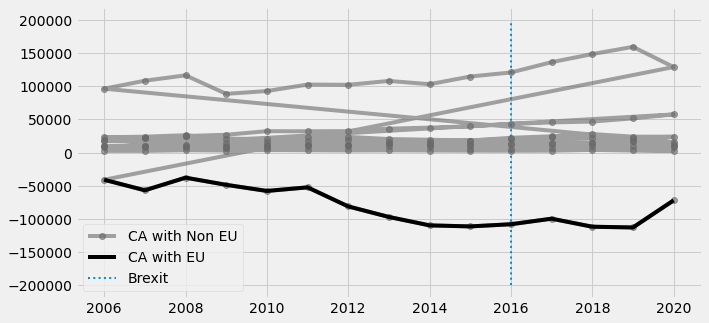

In [155]:
visulaize_origianl('EU','CA', data_c)

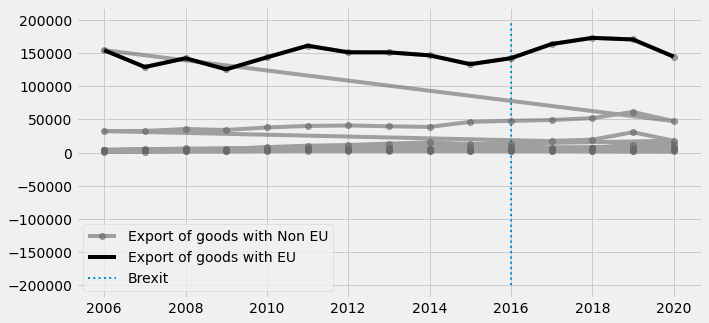

In [156]:
visulaize_origianl('EU','Export of goods', data_g)


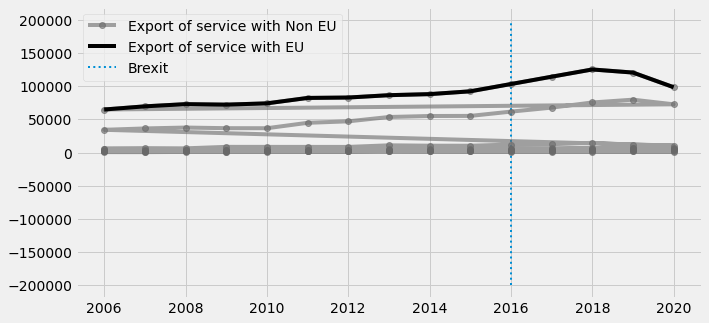

In [157]:
visulaize_origianl('EU','Export of service', data_s)

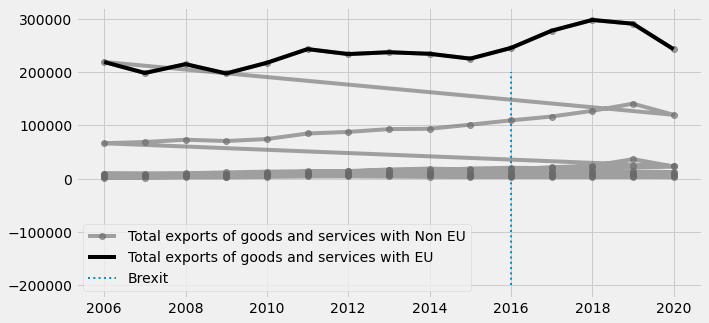

In [158]:
visulaize_origianl('EU','Total exports of goods and services', data_g_s)

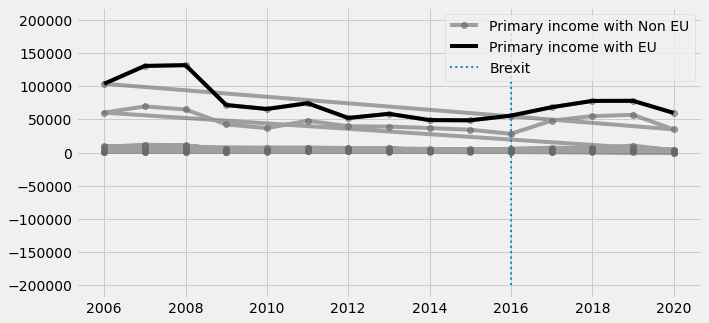

In [159]:
visulaize_origianl('EU','Primary income', data_primary)

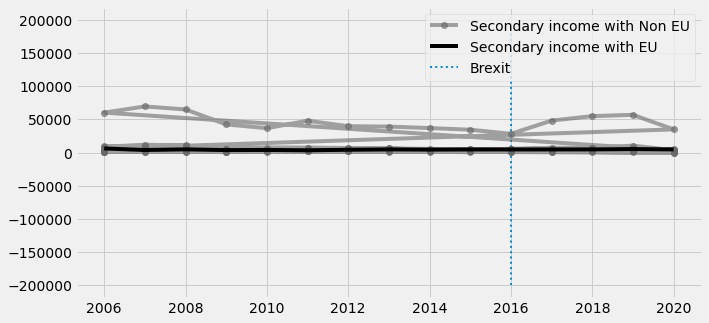

In [160]:
visulaize_origianl('EU','Secondary income', data_secondary)

## 5.2 Datframe of Difference

5.2.1 Synthetic Control Method

In [161]:
synthetic_control_dataframe('EU','CA', data_c)

Sum of weight: 1.0000000000000009
Pre- RMSPE : 1.1915079961260686
Post- RMSPE : 1.1537081779227192


country  year      CA   Synthetic   Difference
120      EU  2006  -41134  11041.7720  -52175.7720
121      EU  2007  -57047  11570.5873  -68617.5873
122      EU  2008  -37986  12643.1383  -50629.1383
123      EU  2009  -48781   9438.9017  -58219.9017
124      EU  2010  -58028  11329.2928  -69357.2928
125      EU  2011  -52600  12672.6492  -65272.6492
126      EU  2012  -81354  12208.6652  -93562.6652
127      EU  2013  -97270  14371.2140 -111641.2140
128      EU  2014 -109969  12622.2057 -122591.2057
129      EU  2015 -111525  12826.8018 -124351.8018
130      EU  2016 -108255  13528.2962 -121783.2962
131      EU  2017  -99874  13751.4510 -113625.4510
132      EU  2018 -111992  16167.6890 -128159.6890
133      EU  2019 -113119  18892.7561 -132011.7561
134      EU  2020  -72205  11948.3056  -84153.3056

In [162]:
synthetic_control_dataframe('EU','Export of goods', data_g)

Sum of weight: 1.0000000000000009
Pre- RMSPE : 0.9688334926286077
Post- RMSPE : 0.9600440519287172


country  year  Export of goods  Synthetic   Difference
120      EU  2006           154412  4057.8898  150354.1102
121      EU  2007           128977  3547.9228  125429.0772
122      EU  2008           142223  3832.9842  138390.0158
123      EU  2009           125524  3899.3754  121624.6246
124      EU  2010           143585  4725.8404  138859.1596
125      EU  2011           161116  5437.3890  155678.6110
126      EU  2012           151187  4750.4484  146436.5516
127      EU  2013           151099  4559.9102  146539.0898
128      EU  2014           146583  4468.3438  142114.6562
129      EU  2015           133260  4549.1432  128710.8568
130      EU  2016           142309  5437.8173  136871.1827
131      EU  2017           163629  5953.9613  157675.0387
132      EU  2018           172968  6845.1962  166122.8038
133      EU  2019           170578  6441.5706  164136.4294
134      EU  2020           144702  6674.7795  138027.2205

In [163]:
synthetic_control_dataframe('EU','Export of service', data_s)

Sum of weight: 1.000000000000009
Pre- RMSPE : 0.7336089053289315
Post- RMSPE : 0.692999566075927


country  year  Export of service   Synthetic  Difference
120      EU  2006              64880  16376.8711  48503.1289
121      EU  2007              69637  17361.6964  52275.3036
122      EU  2008              72965  18014.5288  54950.4712
123      EU  2009              72215  17672.0134  54542.9866
124      EU  2010              74149  17801.2739  56347.7261
125      EU  2011              82334  21583.2731  60750.7269
126      EU  2012              82942  22488.0444  60453.9556
127      EU  2013              86476  25659.1008  60816.8992
128      EU  2014              88072  26345.5406  61726.4594
129      EU  2015              92310  26295.2883  66014.7117
130      EU  2016             103311  29564.1643  73746.8357
131      EU  2017             114367  32191.1159  82175.8841
132      EU  2018             125287  35857.7058  89429.2942
133      EU  2019             120622  37733.6847  82888.3153
134      EU  2020              98510  34440.7013  64069.2987

In [164]:
synthetic_control_dataframe('EU','Total exports of goods and services', data_g_s)

Sum of weight: 1.000000000000009
Pre- RMSPE : 0.8195697314307866
Post- RMSPE : 0.7797292617987392


country  year  Total exports of goods and services   Synthetic  \
120      EU  2006                               219292  32426.0720   
121      EU  2007                               198614  33273.3930   
122      EU  2008                               215188  35291.6023   
123      EU  2009                               197739  34321.6569   
124      EU  2010                               217734  36500.5283   
125      EU  2011                               243450  41641.1962   
126      EU  2012                               234129  42583.8856   
127      EU  2013                               237575  45139.2184   
128      EU  2014                               234655  45342.9760   
129      EU  2015                               225570  48540.5274   
130      EU  2016                               245620  52934.7989   
131      EU  2017                               277996  56450.3695   
132      EU  2018                               298255  61810.9018   
133      EU  2019                               291200  67511.1252   
134      EU  2020                               243212  58265.0744   

      Difference  
120  186865.9280  
121  165340.6070  
122  179896.3977  
123  163417.3431  
124  181233.4717  
125  201808.8038  
126  191545.1144  
127  192435.7816  
128  189312.0240  
129  177029.4726  
130  192685.2011  
131  221545.6305  
132  236444.0982  
133  223688.8748  
134  184946.9256

In [165]:
synthetic_control_dataframe('EU','Primary income', data_primary)

Sum of weight: 1.0000000000000009
Pre- RMSPE : 0.9604662783984331
Post- RMSPE : 0.949913368940628


country  year  Primary income  Synthetic   Difference
120      EU  2006          103730  5092.7108   98637.2892
121      EU  2007          130643  6271.3715  124371.6285
122      EU  2008          131807  5705.0508  126101.9492
123      EU  2009           71650  2285.7216   69364.2784
124      EU  2010           65688  2506.2709   63181.7291
125      EU  2011           74363  2135.2165   72227.7835
126      EU  2012           52141  2268.8347   49872.1653
127      EU  2013           58360  2093.0468   56266.9532
128      EU  2014           48924  1834.6976   47089.3024
129      EU  2015           48563   854.2158   47708.7842
130      EU  2016           55619  3446.4271   52172.5729
131      EU  2017           68304  3672.9318   64631.0682
132      EU  2018           77832  4532.7000   73299.3000
133      EU  2019           77993  5131.1498   72861.8502
134      EU  2020           59780  1381.0126   58398.9874

In [166]:
synthetic_control_dataframe('EU','Secondary income', data_secondary)

Sum of weight: 1.0000000000000009
Pre- RMSPE : 0.47305937933683523
Post- RMSPE : 0.3666889701650724


country  year  Secondary income  Synthetic  Difference
120      EU  2006              6104  5092.7108   1011.2892
121      EU  2007              3769  6271.3715  -2502.3715
122      EU  2008              4753  5705.0508   -952.0508
123      EU  2009              3630  2285.7216   1344.2784
124      EU  2010              3856  2506.2709   1349.7291
125      EU  2011              3320  2135.2165   1184.7835
126      EU  2012              4135  2268.8347   1866.1653
127      EU  2013              4657  2093.0468   2563.9532
128      EU  2014              4360  1834.6976   2525.3024
129      EU  2015              4571   854.2158   3716.7842
130      EU  2016              4599  3446.4271   1152.5729
131      EU  2017              4597  3672.9318    924.0682
132      EU  2018              4675  4532.7000    142.3000
133      EU  2019              5169  5131.1498     37.8502
134      EU  2020              4675  1381.0126   3293.9874

5.2.1 Augmented Synthetic Control Method

In [167]:
agumented_synthetic_control_dataframe('EU','CA', data_c)

Pre- RMSPE : 0.09143213457138007
Post- RMSPE : 0.8786797869251954


country  year      CA           ASCM     Difference
120      EU  2006  -41134  -35015.539107   -6118.460893
121      EU  2007  -57047  -56858.649102    -188.350898
122      EU  2008  -37986  -41903.152109    3917.152109
123      EU  2009  -48781  -52989.508633    4208.508633
124      EU  2010  -58028  -50700.022361   -7327.977639
125      EU  2011  -52600  -61782.457199    9182.457199
126      EU  2012  -81354  -75954.920908   -5399.079092
127      EU  2013  -97270  -99664.934553    2394.934553
128      EU  2014 -109969 -109641.252569    -327.747431
129      EU  2015 -111525 -109653.322074   -1871.677926
130      EU  2016 -108255 -108756.640577     501.640577
131      EU  2017  -99874 -151029.920700   51155.920700
132      EU  2018 -111992 -121755.425193    9763.425193
133      EU  2019 -113119 -183268.355828   70149.355828
134      EU  2020  -72205 -184849.152608  112644.152608

In [168]:
agumented_synthetic_control_dataframe('EU','Export of goods', data_g)

Pre- RMSPE : 0.028230018763373985
Post- RMSPE : 0.179906270886027


country  year  Export of goods           ASCM    Difference
120      EU  2006           154412  149420.061227   4991.938773
121      EU  2007           128977  130650.867377  -1673.867377
122      EU  2008           142223  145836.851802  -3613.851802
123      EU  2009           125524  125383.092643    140.907357
124      EU  2010           143585  140148.904808   3436.095192
125      EU  2011           161116  161222.160820   -106.160820
126      EU  2012           151187  153761.807707  -2574.807707
127      EU  2013           151099  153263.941590  -2164.941590
128      EU  2014           146583  142082.131855   4500.868145
129      EU  2015           133260  127317.709348   5942.290652
130      EU  2016           142309  149980.635258  -7671.635258
131      EU  2017           163629  185828.546532 -22199.546532
132      EU  2018           172968  216228.398923 -43260.398923
133      EU  2019           170578  169758.439953    819.560047
134      EU  2020           144702  112840.461390  31861.538610

In [169]:
agumented_synthetic_control_dataframe('EU','Export of service', data_s)

Pre- RMSPE : 0.043544914397760474
Post- RMSPE : 0.2014357379281155


country  year  Export of service           ASCM    Difference
120      EU  2006              64880   62522.514283   2357.485717
121      EU  2007              69637   71673.975223  -2036.975223
122      EU  2008              72965   69076.293459   3888.706541
123      EU  2009              72215   65820.222328   6394.777672
124      EU  2010              74149   76176.038575  -2027.038575
125      EU  2011              82334   79680.505178   2653.494822
126      EU  2012              82942   82832.173351    109.826649
127      EU  2013              86476   89693.976007  -3217.976007
128      EU  2014              88072   92987.399701  -4915.399701
129      EU  2015              92310   89288.341030   3021.658970
130      EU  2016             103311  105926.715769  -2615.715769
131      EU  2017             114367  105579.504495   8787.495505
132      EU  2018             125287  149338.875371 -24051.875371
133      EU  2019             120622  139273.948650 -18651.948650
134      EU  2020              98510  128974.397125 -30464.397125

In [170]:
agumented_synthetic_control_dataframe('EU','Total exports of goods and services', data_g_s)

Pre- RMSPE : 0.014002556926979498
Post- RMSPE : 0.06562799530069297


country  year  Total exports of goods and services           ASCM  \
120      EU  2006                               219292  217979.959479   
121      EU  2007                               198614  203915.013333   
122      EU  2008                               215188  209504.231012   
123      EU  2009                               197739  198972.466928   
124      EU  2010                               217734  213604.540662   
125      EU  2011                               243450  246660.064842   
126      EU  2012                               234129  234517.797109   
127      EU  2013                               237575  239778.756783   
128      EU  2014                               234655  233033.828400   
129      EU  2015                               225570  225803.508307   
130      EU  2016                               245620  245385.644740   
131      EU  2017                               277996  265419.430636   
132      EU  2018                               298255  332349.065342   
133      EU  2019                               291200  280573.779061   
134      EU  2020                               243212  250016.187137   

       Difference  
120   1312.040521  
121  -5301.013333  
122   5683.768988  
123  -1233.466928  
124   4129.459338  
125  -3210.064842  
126   -388.797109  
127  -2203.756783  
128   1621.171600  
129   -233.508307  
130    234.355260  
131  12576.569364  
132 -34094.065342  
133  10626.220939  
134  -6804.187137

In [171]:
agumented_synthetic_control_dataframe('EU','Primary income', data_primary)

Pre- RMSPE : 0.03779030693013761
Post- RMSPE : 0.4512643893693032


country  year  Primary income           ASCM    Difference
120      EU  2006          103730  110643.797846  -6913.797846
121      EU  2007          130643  131768.511891  -1125.511891
122      EU  2008          131807  124537.029621   7269.970379
123      EU  2009           71650   67611.090554   4038.909446
124      EU  2010           65688   65476.480773    211.519227
125      EU  2011           74363   76579.839305  -2216.839305
126      EU  2012           52141   50248.432271   1892.567729
127      EU  2013           58360   61209.152959  -2849.152959
128      EU  2014           48924   49358.947837   -434.947837
129      EU  2015           48563   47963.819670    599.180330
130      EU  2016           55619   56280.539886   -661.539886
131      EU  2017           68304   96017.819682 -27713.819682
132      EU  2018           77832  118307.382320 -40475.382320
133      EU  2019           77993  125848.418004 -47855.418004
134      EU  2020           59780   63058.052265  -3278.052265

In [172]:
agumented_synthetic_control_dataframe('EU','Secondary income', data_secondary)

Pre- RMSPE : 0.10295811365631784
Post- RMSPE : 0.294609789263971


country  year  Secondary income         ASCM   Difference
120      EU  2006              6104  4880.220091  1223.779909
121      EU  2007              3769  4238.749153  -469.749153
122      EU  2008              4753  5489.470523  -736.470523
123      EU  2009              3630  3494.681223   135.318777
124      EU  2010              3856  3481.981600   374.018400
125      EU  2011              3320  3335.640136   -15.640136
126      EU  2012              4135  3963.194395   171.805605
127      EU  2013              4657  4889.204621  -232.204621
128      EU  2014              4360  4948.468461  -588.468461
129      EU  2015              4571  4392.675048   178.324952
130      EU  2016              4599  4388.538057   210.461943
131      EU  2017              4597  2962.589330  1634.410670
132      EU  2018              4675  5209.738780  -534.738780
133      EU  2019              5169  5136.117414    32.882586
134      EU  2020              4675  6805.324219 -2130.324219

## 5.3 Viusalization

5.3.1 Synthetic Control Method

Sum of weight: 1.0000000000000009


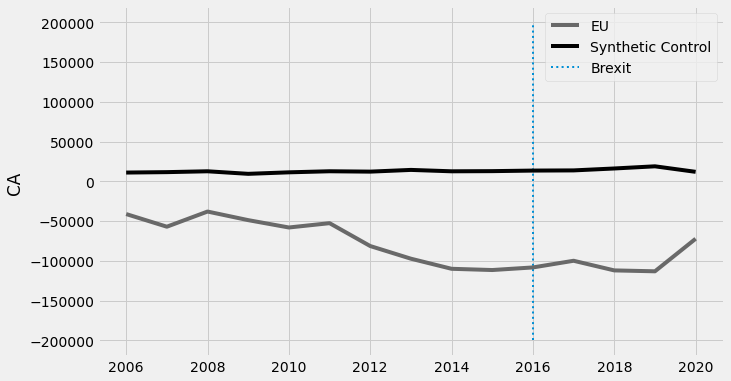

In [173]:
synthetic_plot('EU','CA', data_c)

Sum of weight: 1.0000000000000009


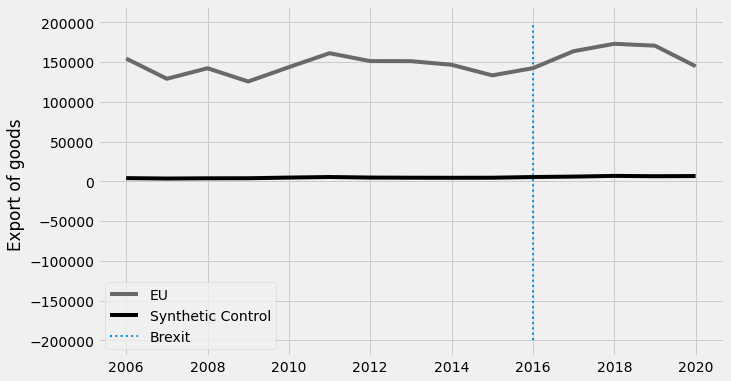

In [174]:
synthetic_plot('EU','Export of goods', data_g)

Sum of weight: 1.000000000000009


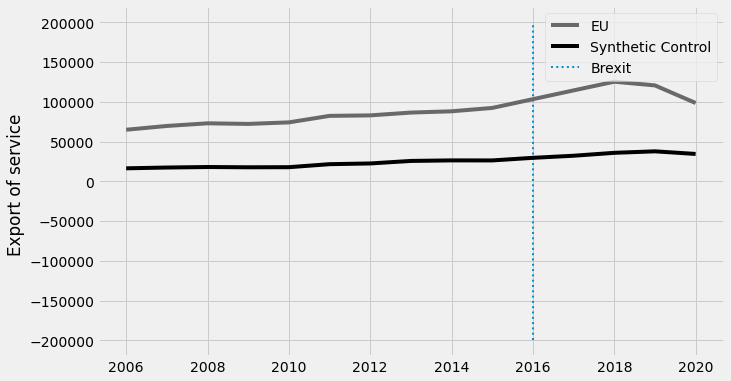

In [175]:
synthetic_plot('EU','Export of service', data_s)

Sum of weight: 1.000000000000009


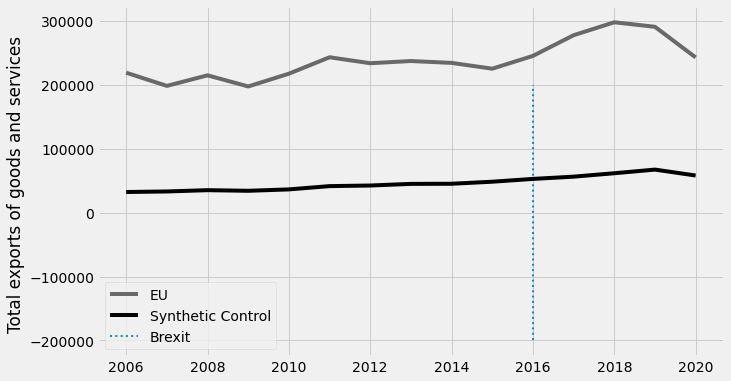

In [176]:
synthetic_plot('EU','Total exports of goods and services', data_g_s)

Sum of weight: 1.0000000000000009


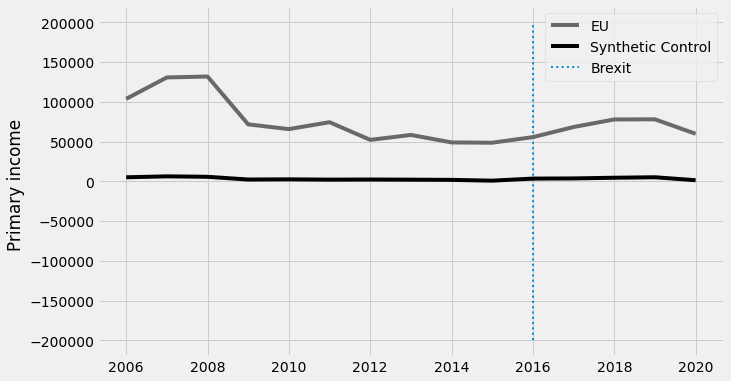

In [177]:
synthetic_plot('EU','Primary income', data_primary)

Sum of weight: 1.0000000000000009


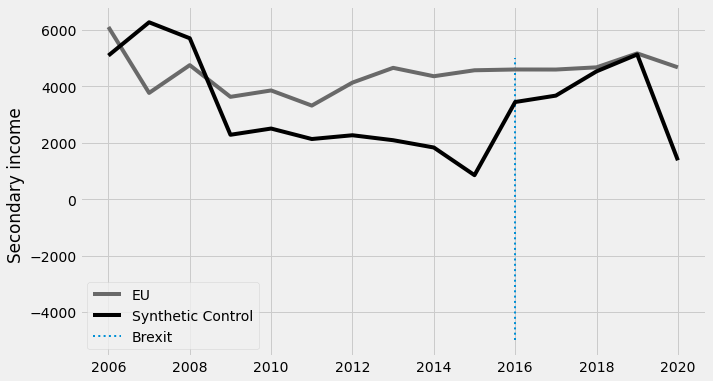

In [178]:
synthetic_plot_magnified('EU','Secondary income', data_secondary)

5.3.2 Augmented Synthetic Control Method

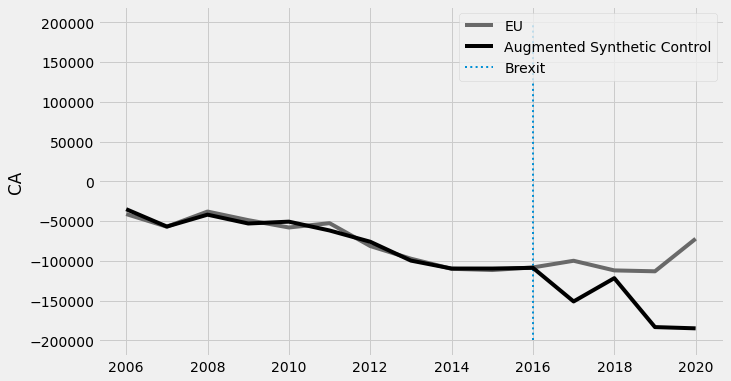

In [179]:
agumented_synthetic_control_visualize('EU','CA', data_c)

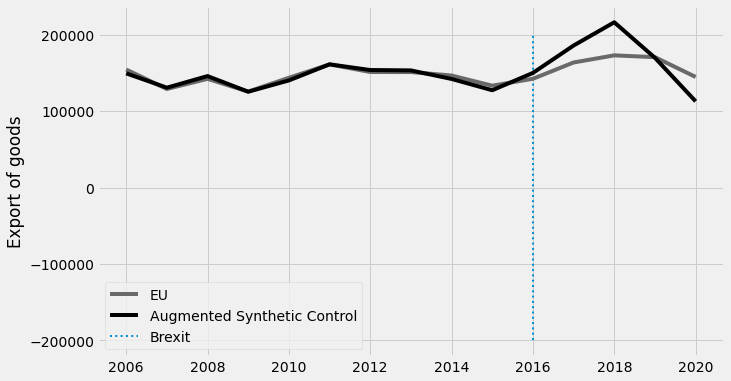

In [180]:
agumented_synthetic_control_visualize('EU','Export of goods', data_g)

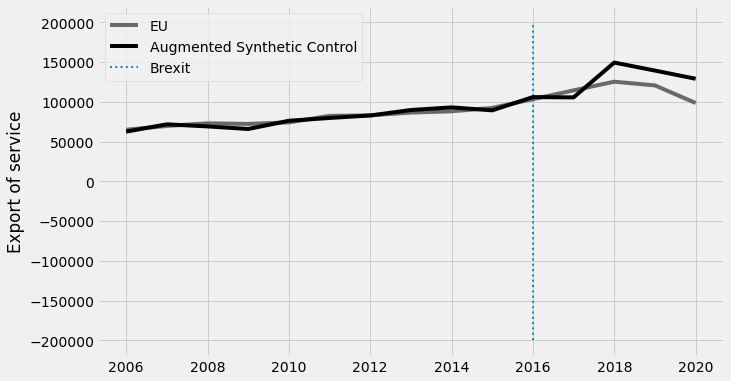

In [181]:
agumented_synthetic_control_visualize('EU','Export of service', data_s)

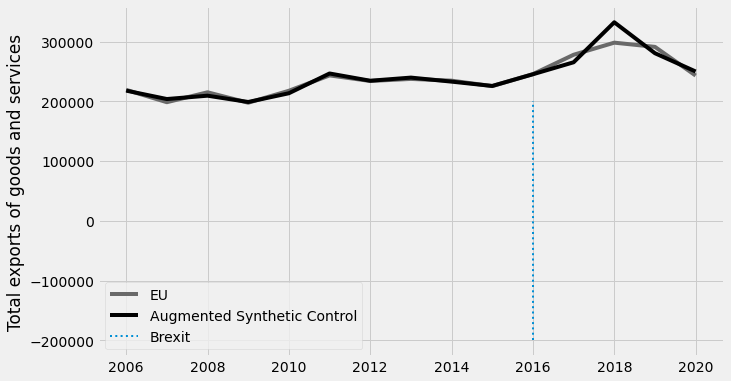

In [182]:
agumented_synthetic_control_visualize('EU','Total exports of goods and services', data_g_s)

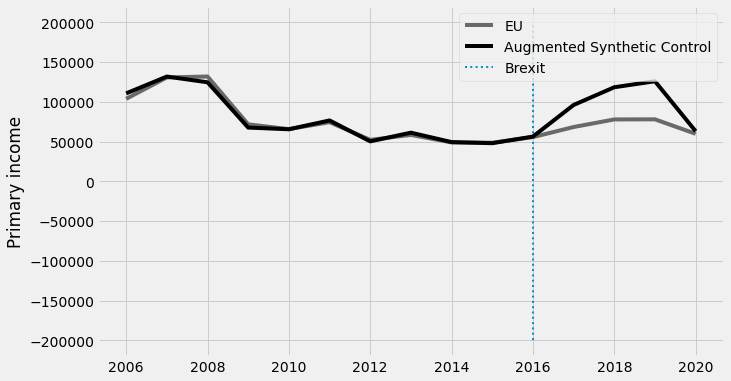

In [183]:
agumented_synthetic_control_visualize('EU','Primary income', data_primary)

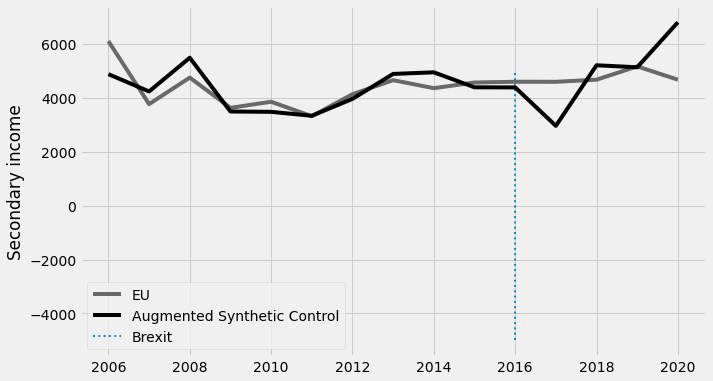

In [184]:
agumented_synthetic_control_visualize_magnified('EU','Secondary income', data_secondary)

# 6. Robust analysis

## 6.1 RSMPE table

In [185]:
rmspe_table('CA', data_c)

************************************************************************************************************************************************************************************************************************************************************************************************************
************************************************************************************************************************************************************************************************************************************************************************************************************
< Brazil >

Pre- RMSPE : 0.04983314343275479

Post- RMSPE : 0.7227080970256069

Ratio Post_RMSPE/Pre_RMSPE :  14.50255888434641

*****************************************************************************************************************************************************************************************************************************************************************************

In [186]:
rmspe_table('Export of goods', data_g)

************************************************************************************************************************************************************************************************************************************************************************************************************
************************************************************************************************************************************************************************************************************************************************************************************************************
< Brazil >

Pre- RMSPE : 0.13131191174879248

Post- RMSPE : 0.511976617625048

Ratio Post_RMSPE/Pre_RMSPE :  3.898935068468806

******************************************************************************************************************************************************************************************************************************************************************************

In [187]:
rmspe_table('Export of service', data_s)

************************************************************************************************************************************************************************************************************************************************************************************************************
************************************************************************************************************************************************************************************************************************************************************************************************************
< Brazil >

Pre- RMSPE : 0.15472938714949466

Post- RMSPE : 0.512314882411546

Ratio Post_RMSPE/Pre_RMSPE :  3.311038011910197

******************************************************************************************************************************************************************************************************************************************************************************

In [188]:
rmspe_table('Total exports of goods and services', data_g_s)

************************************************************************************************************************************************************************************************************************************************************************************************************
************************************************************************************************************************************************************************************************************************************************************************************************************
< Brazil >

Pre- RMSPE : 0.06344218351095507

Post- RMSPE : 0.30999527306584124

Ratio Post_RMSPE/Pre_RMSPE :  4.88626424738852

*****************************************************************************************************************************************************************************************************************************************************************************

In [189]:
rmspe_table('Primary income', data_primary)

************************************************************************************************************************************************************************************************************************************************************************************************************
************************************************************************************************************************************************************************************************************************************************************************************************************
< Brazil >

Pre- RMSPE : 0.1540788258107562

Post- RMSPE : 2.0774596559100775

Ratio Post_RMSPE/Pre_RMSPE :  13.483096363037385

*****************************************************************************************************************************************************************************************************************************************************************************

In [190]:
rmspe_table('Secondary income', data_secondary)

************************************************************************************************************************************************************************************************************************************************************************************************************
************************************************************************************************************************************************************************************************************************************************************************************************************
< Brazil >

Pre- RMSPE : 0.18652068955263434

Post- RMSPE : 1.3429077856034342

Ratio Post_RMSPE/Pre_RMSPE :  7.199779224623113

*****************************************************************************************************************************************************************************************************************************************************************************

## 6.1 in place placebo test

### 6.1.1 in-place placebo visulization

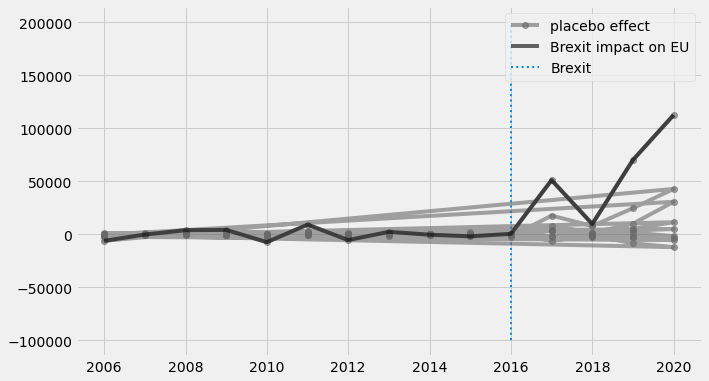

In [191]:
placebo_visualize('EU','CA', data_c)

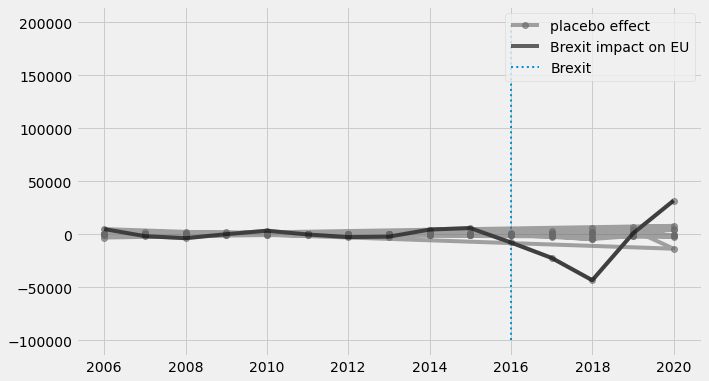

In [192]:
placebo_visualize('EU','Export of goods', data_g)

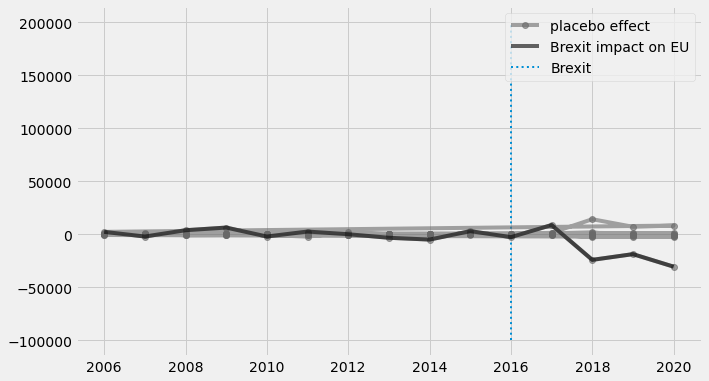

In [193]:
placebo_visualize('EU','Export of service', data_s)

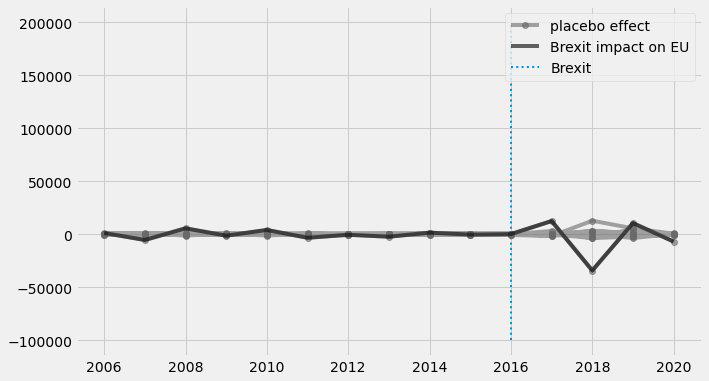

In [194]:
placebo_visualize('EU','Total exports of goods and services', data_g_s)

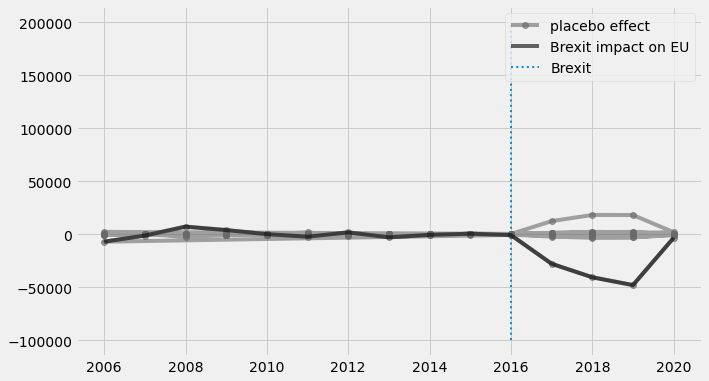

In [195]:
placebo_visualize('EU','Primary income', data_primary)

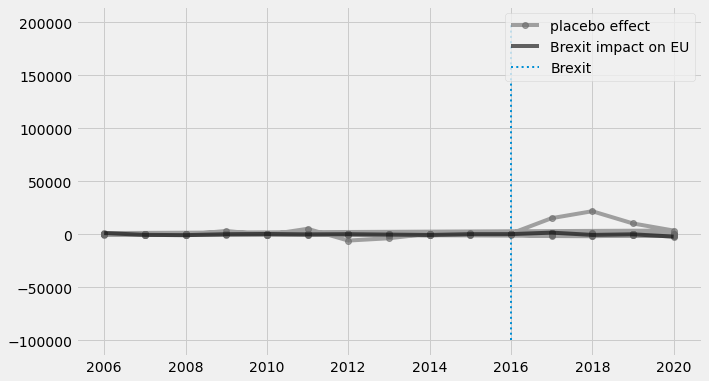

In [196]:
placebo_visualize('EU','Secondary income', data_secondary)

### 6.1.1 p-value of in-place placebo 

In [197]:
p_value_analysis('EU','CA', data_c)

Placebo effects: {'Brazil': -1689.215583079731, 'Canada': -2437.3497133801866, 'China': 7919.0367633949645, 'India': 3581.219674763419, 'Japan': -5964.623360307858, 'Russia': 4045.374495483872, 'Switzerland': 3113.393815829015, 'USA': 17670.951170667424}
Brexit Treatment Effect for the Year 2017 (EU): 51155.92070037234
p-value : 0.0


Placebo effects: {'Brazil': -210.59642675869873, 'Canada': -763.9357663536412, 'China': 1497.5563498831398, 'India': 445.1019818066343, 'Japan': -1133.2246036450997, 'Russia': 1127.8933324841255, 'Switzerland': -2346.1685888372776, 'USA': 7898.752294214821}
Brexit Treatment Effect for the Year 2018 (EU): 9763.425192934315
p-value : 0.0


Placebo effects: {'Brazil': -2079.365402977339, 'Canada': -2630.836852505945, 'China': 10048.389315179462, 'India': 4027.163746848886, 'Japan': -8442.243808186482, 'Russia': 5419.107710081996, 'Switzerland': 1676.121130665695, 'USA': 24678.357288453815}
Brexit Treatment Effect for the Year 2019 (EU): 70149.35582781764
p-v

In [198]:
p_value_analysis('EU','Export of goods', data_g)

Placebo effects: {'Brazil': -615.4222646997473, 'Canada': 1030.169748467998, 'China': -1707.5277086920178, 'India': 1032.0648317734108, 'Japan': 632.9939698543212, 'Russia': -1593.7459799978478, 'Switzerland': -2493.458167278455, 'USA': 2995.4461114837686}
Brexit Treatment Effect for the Year 2017 (EU): -22199.546531982603
p-value : 0.0


Placebo effects: {'Brazil': -922.1913033349597, 'Canada': 2006.7028293144485, 'China': -4756.5956396947695, 'India': 2620.4963259339524, 'Japan': 1157.3228367576558, 'Russia': -3133.661603677001, 'Switzerland': -4382.60627999614, 'USA': 5855.529680912747}
Brexit Treatment Effect for the Year 2018 (EU): -43260.39892267631
p-value : 0.0


Placebo effects: {'Brazil': -1595.935383669283, 'Canada': -79.26605153593209, 'China': 6521.208377085764, 'India': 58.416478166211164, 'Japan': -188.7218622796745, 'Russia': 1050.794298495121, 'Switzerland': -1549.0990637201048, 'USA': 4134.918696028042}
Brexit Treatment Effect for the Year 2019 (EU): 819.560047066363


In [199]:
p_value_analysis('EU','Export of service', data_s)

Placebo effects: {'Brazil': 145.4860424674016, 'Canada': -362.5640500929203, 'China': 49.41484877507628, 'India': -312.40564927083005, 'Japan': -45.92522546904911, 'Russia': 55.89486588559794, 'Switzerland': 954.8912279646011, 'USA': 1449.868163915773}
Brexit Treatment Effect for the Year 2017 (EU): 8787.495504509527
p-value : 0.0


Placebo effects: {'Brazil': 191.60259781822538, 'Canada': -607.5402550261178, 'China': -1767.9054521296284, 'India': 1392.5350620118506, 'Japan': -2643.899868816825, 'Russia': -1571.7812182747234, 'Switzerland': 1936.7345777062146, 'USA': 14282.768506109642}
Brexit Treatment Effect for the Year 2018 (EU): -24051.875370635535
p-value : 0.0


Placebo effects: {'Brazil': -897.5483694486798, 'Canada': 202.06410141911965, 'China': -297.3264795047453, 'India': 988.8831192975208, 'Japan': -1658.453624718817, 'Russia': -1021.2201848682143, 'Switzerland': -2119.1588125322032, 'USA': 7138.414759575142}
Brexit Treatment Effect for the Year 2019 (EU): -18651.9486500673

In [200]:
p_value_analysis('EU','Total exports of goods and services', data_g_s)

Placebo effects: {'Brazil': -556.5248162119651, 'Canada': -222.26720880657558, 'China': 3180.211341674749, 'India': -610.1321373129922, 'Japan': -1229.3879648697603, 'Russia': 98.95650465704057, 'Switzerland': 146.90308543364154, 'USA': -1584.1827465919487}
Brexit Treatment Effect for the Year 2017 (EU): 12576.569364082825
p-value : 0.0


Placebo effects: {'Brazil': 1946.2080725678343, 'Canada': 3407.646250264286, 'China': -3776.7228426704023, 'India': 3170.8617228113126, 'Japan': 514.709739685557, 'Russia': -2127.7027184841536, 'Switzerland': -3504.457021102113, 'USA': 12873.993121154053}
Brexit Treatment Effect for the Year 2018 (EU): -34094.06534170336
p-value : 0.0


Placebo effects: {'Brazil': 237.864308526071, 'Canada': 1073.9843568643046, 'China': 5301.665809042723, 'India': 1002.73869283357, 'Japan': -3447.2237956554054, 'Russia': -1390.8307888746585, 'Switzerland': -2111.009238738159, 'USA': 5668.084783775703}
Brexit Treatment Effect for the Year 2019 (EU): 10626.2209393566
p-

In [201]:
p_value_analysis('EU','Primary income', data_primary)

Placebo effects: {'Brazil': -1511.5011571033938, 'Canada': 867.479820742928, 'China': 1402.870909948402, 'India': -381.93783014546625, 'Japan': -2093.831781875756, 'Russia': 1410.743131677169, 'Switzerland': 1066.060211364279, 'USA': 12482.465750810377}
Brexit Treatment Effect for the Year 2017 (EU): -27713.819682179572
p-value : 0.0


Placebo effects: {'Brazil': -2616.182455090668, 'Canada': 2074.6241828934208, 'China': 1450.8749797962282, 'India': -83.8712250827084, 'Japan': -3225.1793148558772, 'Russia': 2399.2527213606277, 'Switzerland': -1221.9586696941578, 'USA': 18307.00507007134}
Brexit Treatment Effect for the Year 2018 (EU): -40475.382319711774
p-value : 0.0


Placebo effects: {'Brazil': -2732.5580805639365, 'Canada': 2345.770213214443, 'China': 612.850771377914, 'India': 300.46267398177406, 'Japan': -2937.340530175088, 'Russia': 1884.649840098046, 'Switzerland': -719.7046545460671, 'USA': 18247.198078213245}
Brexit Treatment Effect for the Year 2019 (EU): -47855.41800432633


In [202]:
p_value_analysis('EU','Secondary income', data_secondary)

Placebo effects: {'Brazil': -83.24277785469394, 'Canada': -549.6370306015651, 'China': 1288.3325459672074, 'India': -475.12837153228884, 'Japan': -1583.7878017774092, 'Russia': 963.5111113581294, 'Switzerland': 1538.3872962601263, 'USA': 15269.899321824327}
Brexit Treatment Effect for the Year 2017 (EU): 1634.410669962689
p-value : 0.125


Placebo effects: {'Brazil': -1520.5607608515838, 'Canada': 733.5453331546732, 'China': 956.861725082701, 'India': -91.42572245073097, 'Japan': -1753.146007027959, 'Russia': 1380.2741411220713, 'Switzerland': -1033.9881670253435, 'USA': 21817.600789455675}
Brexit Treatment Effect for the Year 2018 (EU): -534.7387803381098
p-value : 0.875


Placebo effects: {'Brazil': -997.0590122885324, 'Canada': 638.2899438172235, 'China': 238.76803474390863, 'India': 53.90061272133971, 'Japan': -1059.574083188365, 'Russia': 573.5773579403717, 'Switzerland': -411.1566158066398, 'USA': 10287.017894507626}
Brexit Treatment Effect for the Year 2019 (EU): 32.882586499843

In [203]:
## 6.2 limitation of donor pool


Countries: ['Brazil', 'Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [ 25.67522707  12.67622579  -1.84132778 -10.04537644   6.07869015
  -7.34290678  -1.16131589  -1.64635586]

Countries: ['Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [12.96135524 -1.840265   -3.91510323  8.44974577 -7.95732341  0.9623391
 -2.38361466]

Countries: ['China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [-2.04122198  0.34876032  6.63310157 -4.10779583  0.33491518 -1.22535161]

Countries: ['India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [-5.11795672  7.20904093 -1.24017469  0.21459579 -1.60033989]

Countries: ['Japan', 'Russia', 'Switzerland', 'USA']
Weights: [ 6.09671687 -1.97323342  4.86741574 -2.6372971 ]

Countries: ['Russia', 'Switzerland', 'USA']
Weights: [ 2.72491778  8.11987492 -2.31635848]

Countries: ['Switzerland', 'USA']
Weights: [ 9.21223471 -2.28725351]

Countries: ['USA']
Weights: [-0.70243115]


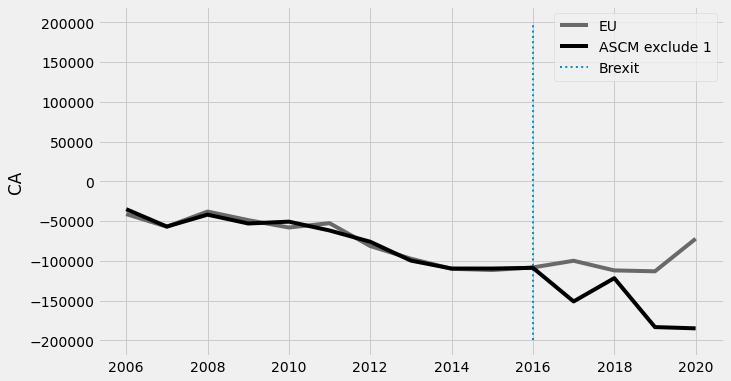

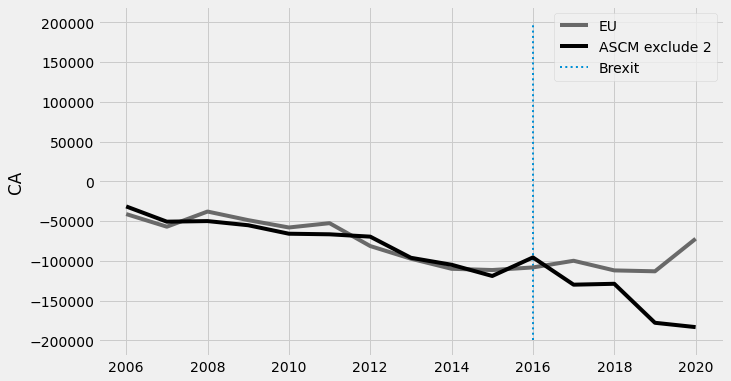

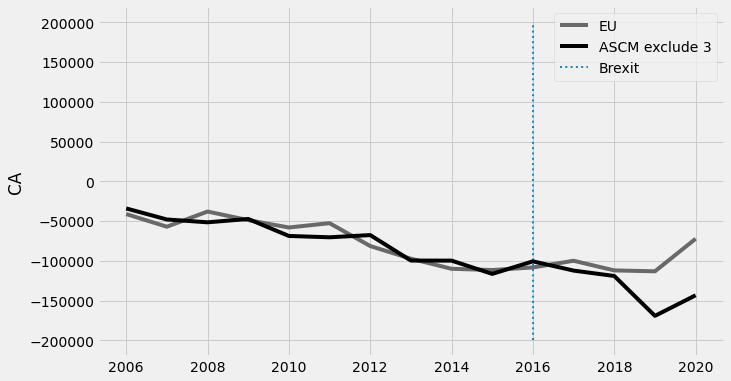

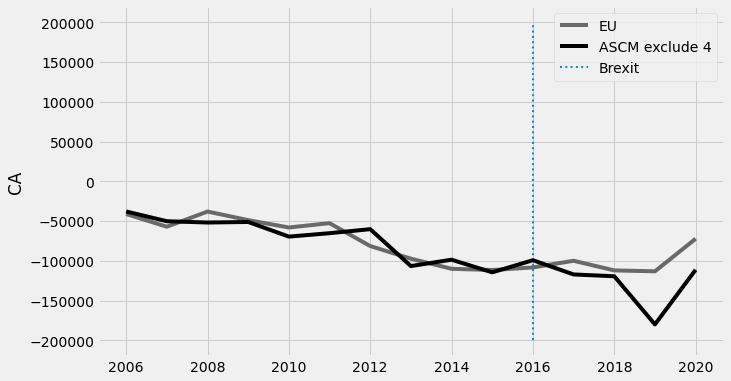

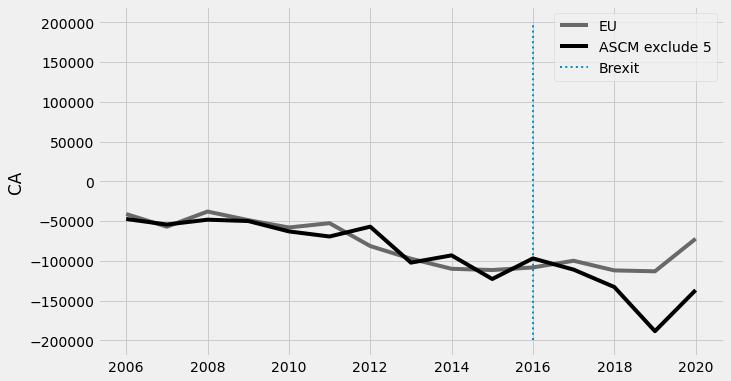

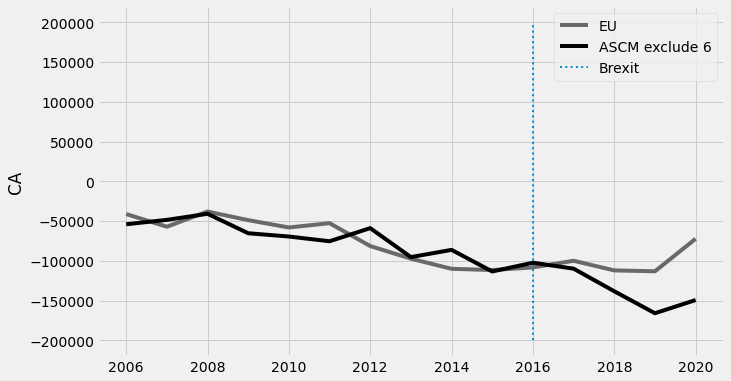

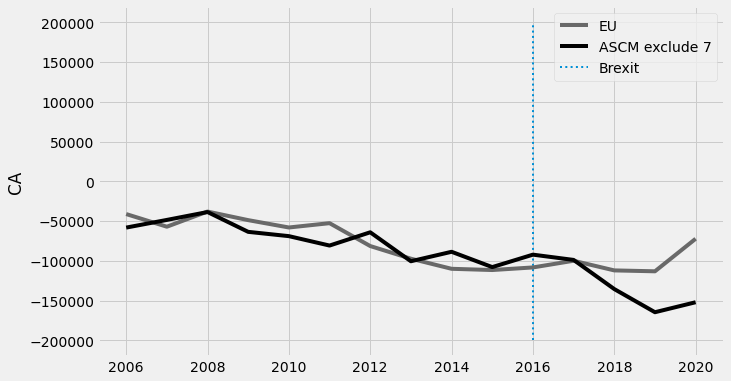

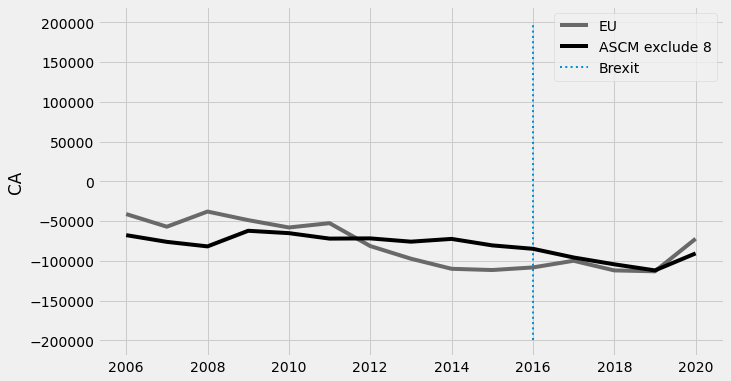

In [204]:
agumented_synthetic_control_visualize_limit_donor_pool('EU','CA', data_c)


Countries: ['Brazil', 'Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [-3.79842718 14.30460213 -3.17213745  5.20621243 25.43198799 -8.11379126
 -4.64372431  1.08174775]

Countries: ['Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [14.36177509 -3.58320272  4.51401252 26.94502806 -8.79428081 -4.43462646
  0.92456442]

Countries: ['China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [-3.60261925  4.81361357 31.36178935 -5.69983721 -3.7902907   1.53918368]

Countries: ['India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [-0.80490024 23.78132434 -1.03540941 -9.6960766   2.51580504]

Countries: ['Japan', 'Russia', 'Switzerland', 'USA']
Weights: [22.44423218 -1.1258432  -9.61590411  2.569455  ]

Countries: ['Russia', 'Switzerland', 'USA']
Weights: [  2.02263947 -12.74323996   5.22161565]

Countries: ['Switzerland', 'USA']
Weights: [-13.76657629   5.53861698]

Countries: ['USA']
Weights: [3.66398184]


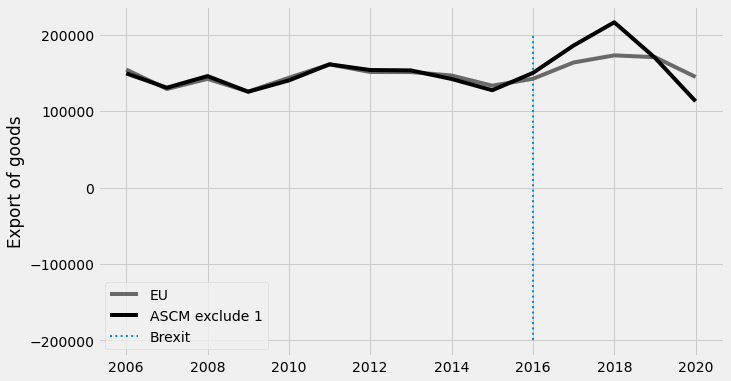

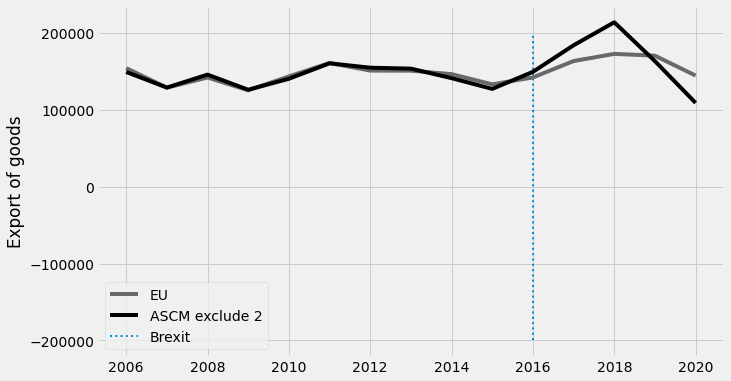

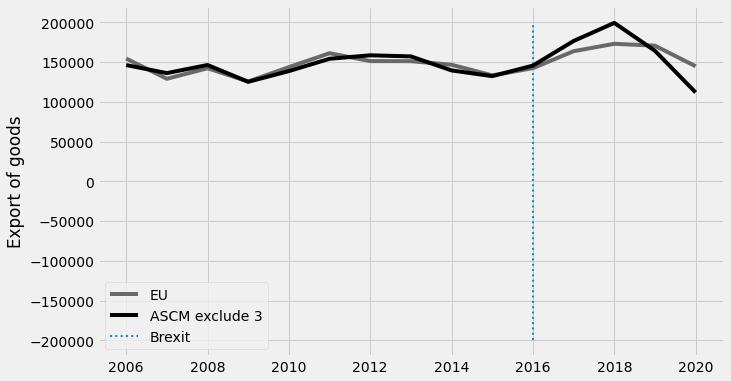

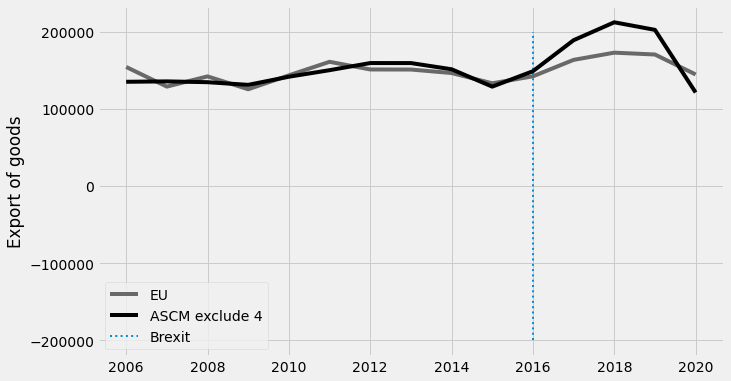

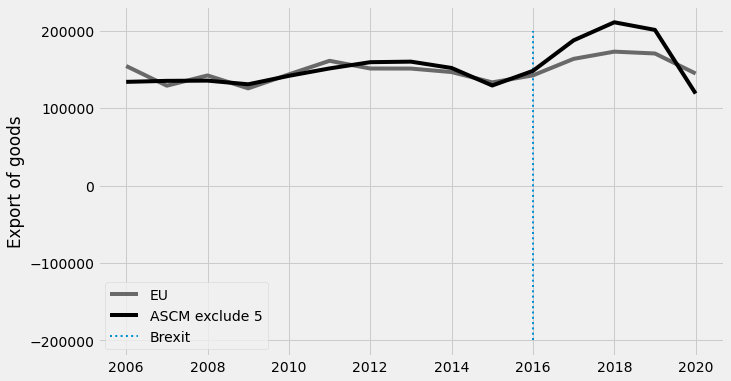

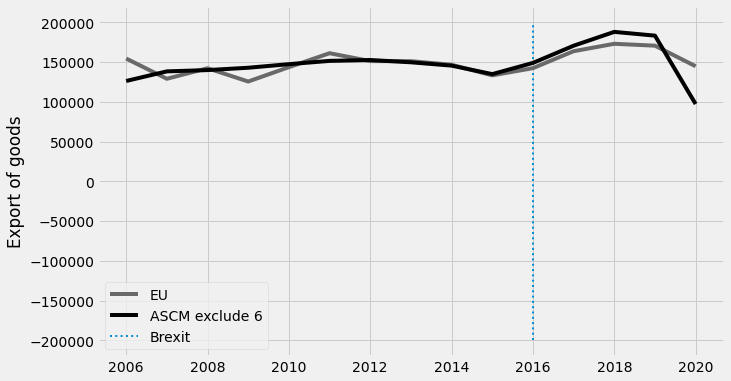

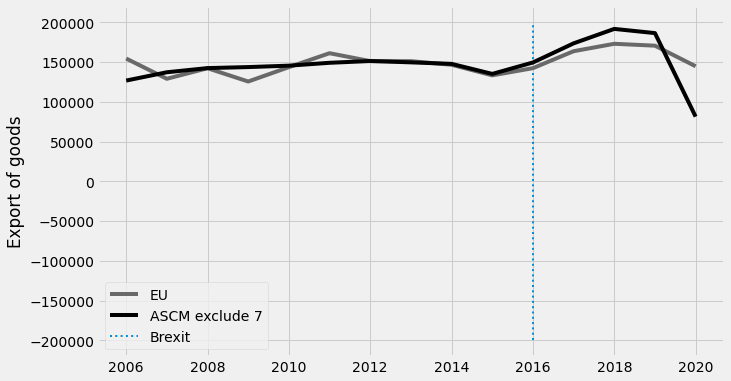

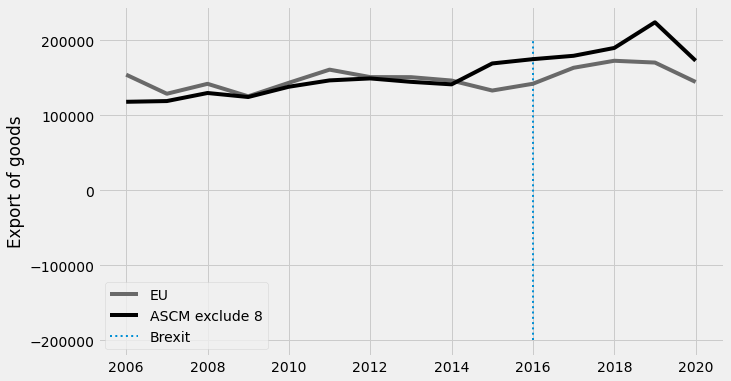

In [205]:
agumented_synthetic_control_visualize_limit_donor_pool('EU','Export of goods', data_g)


Countries: ['Brazil', 'Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [ -1.5420218   11.83985668 -11.0011177   19.77776577  -1.3931903
  -8.64369788  -0.8264232    1.31821743]

Countries: ['Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [ 10.78116546 -11.98886047  19.7714046   -1.19431026  -9.33015489
  -0.61362375   1.39720353]

Countries: ['China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [-14.96893027  24.01667236  -5.52327304 -10.85535972   1.78004047
   2.30557346]

Countries: ['India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [ 7.01636956 -2.48935241  4.81207072  1.75865734  1.14330648]

Countries: ['Japan', 'Russia', 'Switzerland', 'USA']
Weights: [-0.97894887  8.41027688  2.22149117  1.0679246 ]

Countries: ['Russia', 'Switzerland', 'USA']
Weights: [8.06039625 2.14307032 1.00484216]

Countries: ['Switzerland', 'USA']
Weights: [1.4859356  1.47186874]

Countries: ['USA']
Weights: [1.75680242]


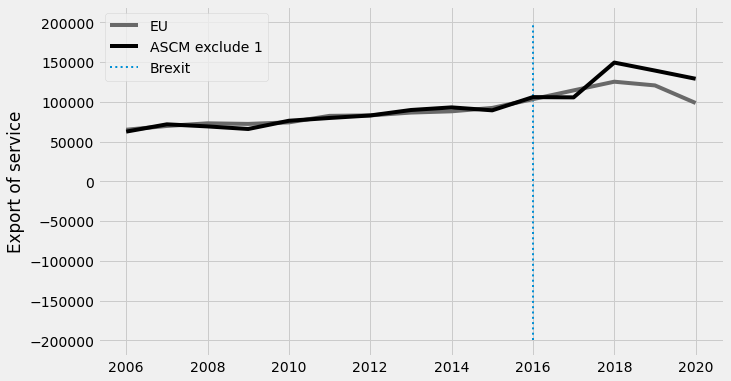

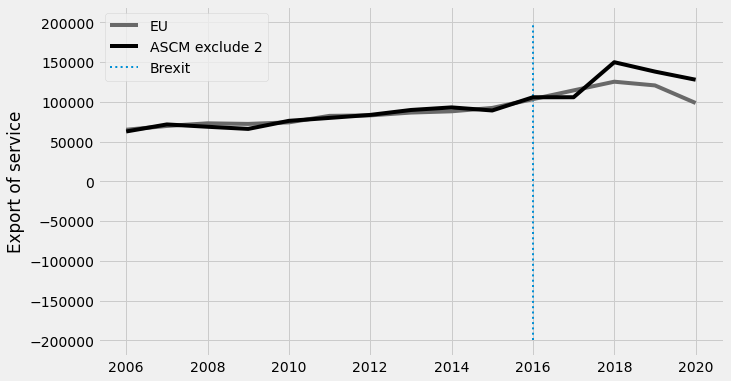

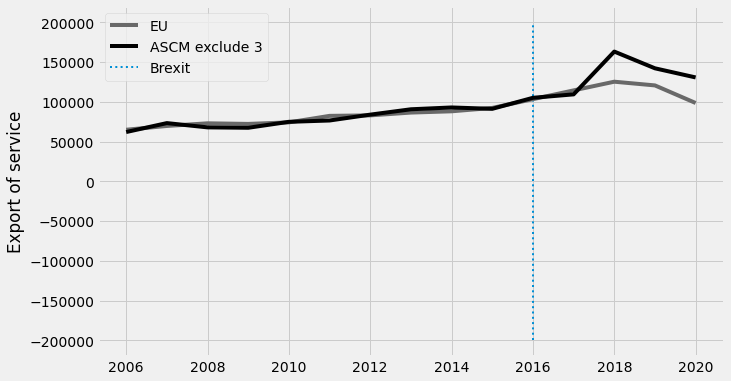

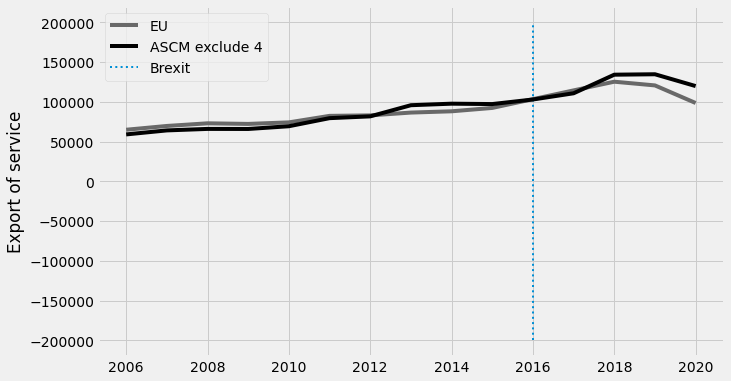

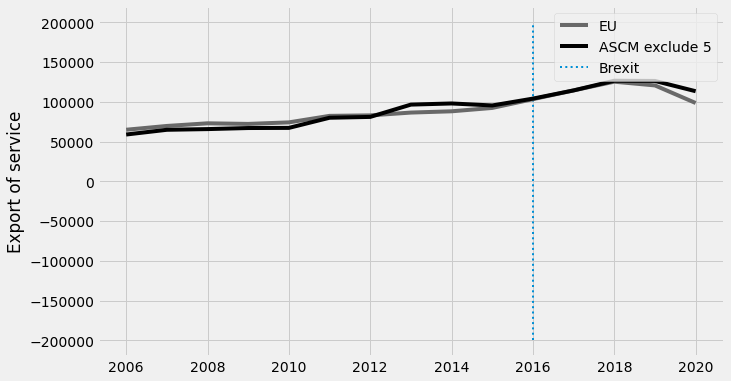

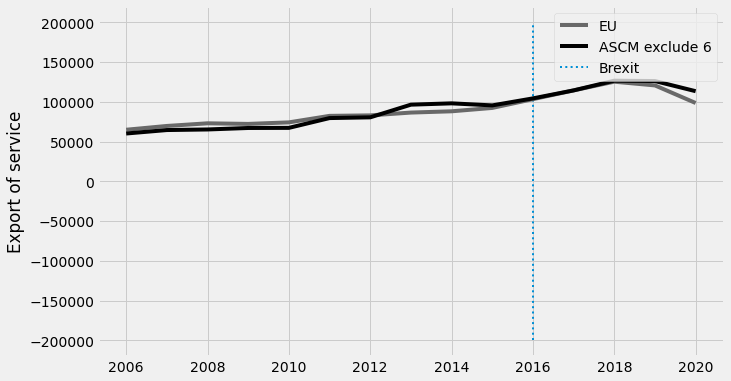

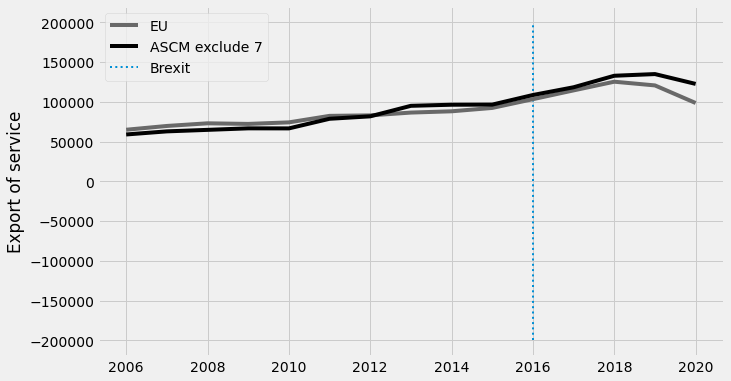

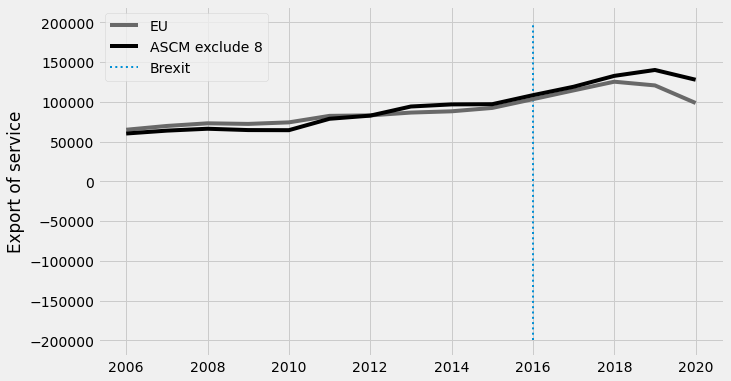

In [206]:
agumented_synthetic_control_visualize_limit_donor_pool('EU','Export of service', data_s)


Countries: ['Brazil', 'Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [ 11.79647709   9.59436572  -5.14982878  11.93900345   7.90036441
 -15.24692379 -10.66340435   3.07656521]

Countries: ['Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [ 9.58524343 -4.84241995  9.97714734  9.11146173 -3.16274987 -4.52440915
  1.73188033]

Countries: ['China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [-6.44113753  8.51869166 12.54566857  5.94454522  1.34293815  1.07251531]

Countries: ['India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [ 13.17743993   7.64303769 -13.14434099 -14.91080468   4.14061965]

Countries: ['Japan', 'Russia', 'Switzerland', 'USA']
Weights: [ 12.91656215   4.2052452  -10.54204586   2.79769714]

Countries: ['Russia', 'Switzerland', 'USA']
Weights: [  1.95983876 -13.90231655   4.82213751]

Countries: ['Switzerland', 'USA']
Weights: [-14.96160782   5.12098261]

Countries: ['USA']
Weights: [2.6266

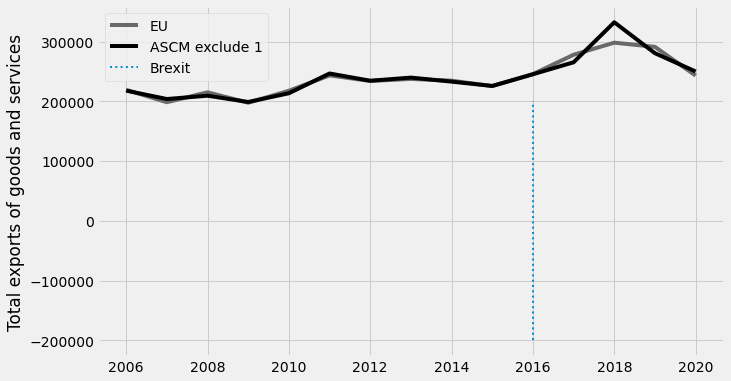

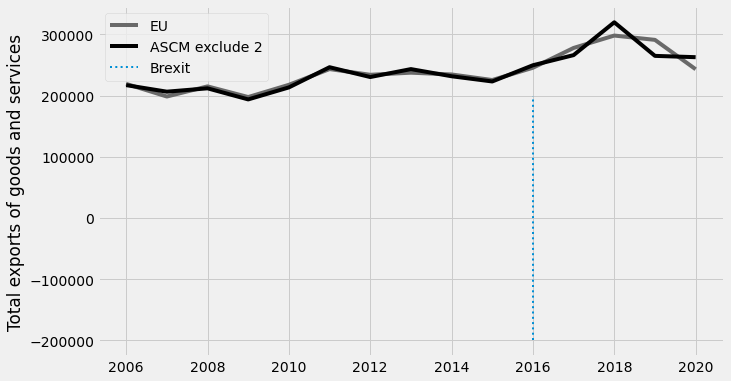

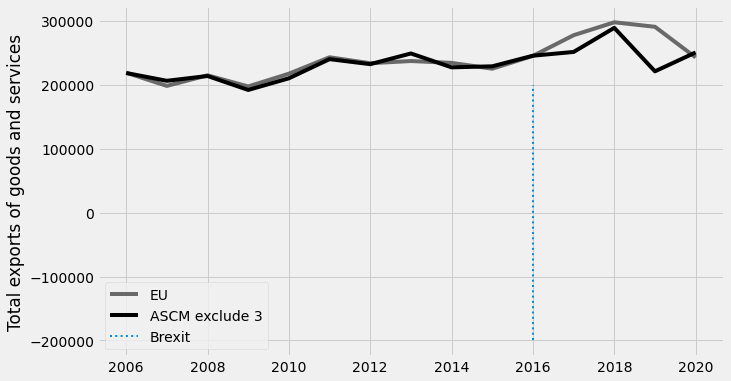

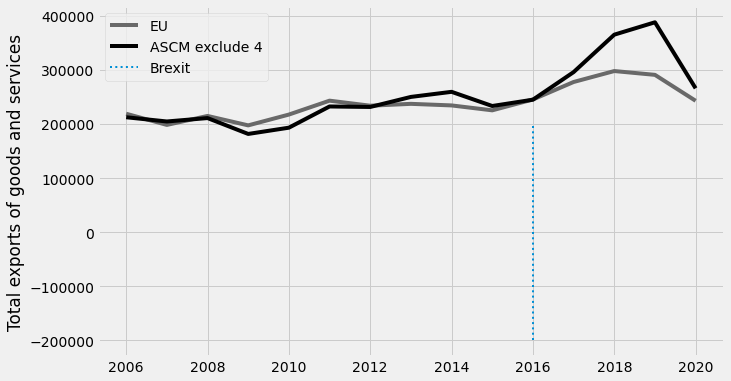

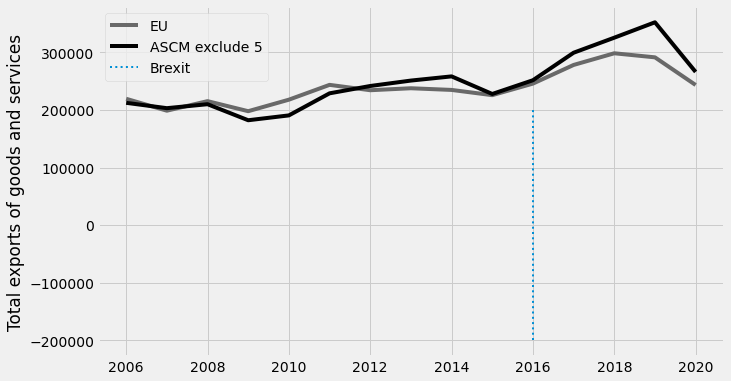

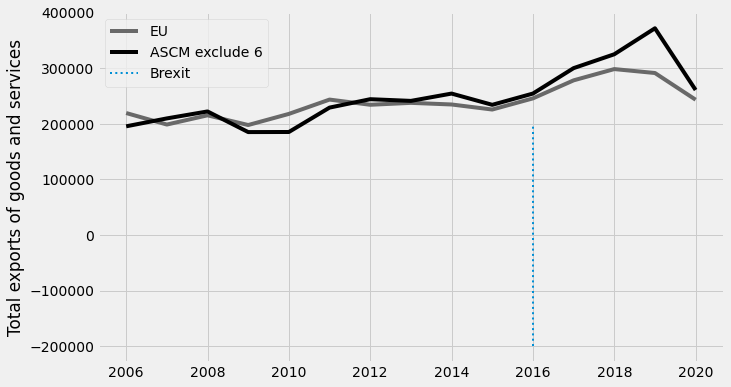

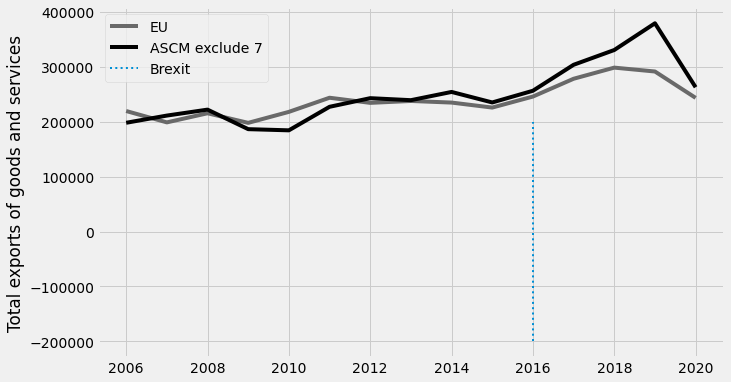

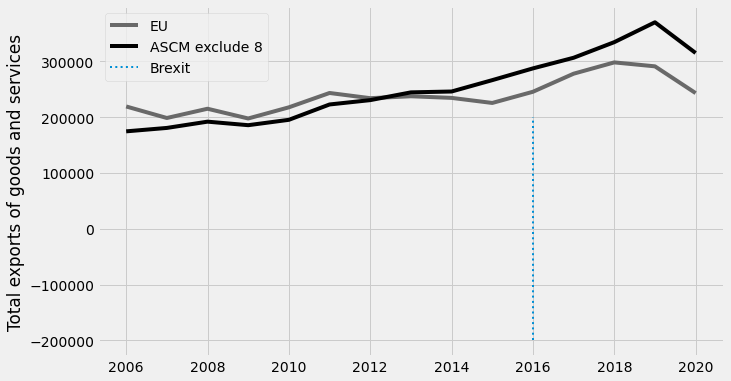

In [207]:
agumented_synthetic_control_visualize_limit_donor_pool('EU','Total exports of goods and services', data_g_s)


Countries: ['Brazil', 'Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [-11.72868998   9.40865413   2.06026215   3.98793088  -9.98333349
   9.62036479  -0.1056558    2.34202814]

Countries: ['Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [ 8.2078883  -0.32729043 -2.92622294 -3.93945895  0.2745509   1.47930343
  1.68823072]

Countries: ['China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [  5.06083861 -16.35141435  -1.65376123  -0.60058958   5.42406351
   1.61236449]

Countries: ['India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [-8.83736682  0.94927946 -4.1739721   5.00014223  1.3564174 ]

Countries: ['Japan', 'Russia', 'Switzerland', 'USA']
Weights: [ 2.32578407 -9.80949693  4.68377366  1.1698551 ]

Countries: ['Russia', 'Switzerland', 'USA']
Weights: [-9.53842106  5.02089437  1.44833514]

Countries: ['Switzerland', 'USA']
Weights: [4.00657573 1.10334738]

Countries: ['USA']
Weights: [1.72240688]


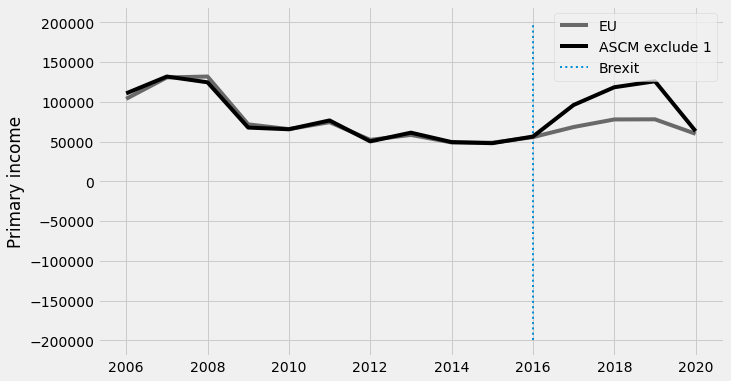

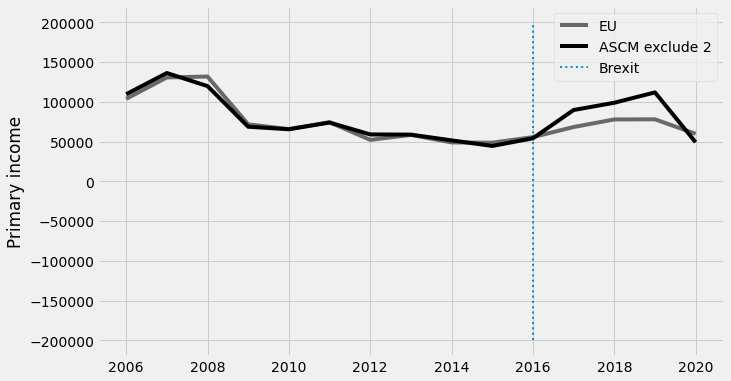

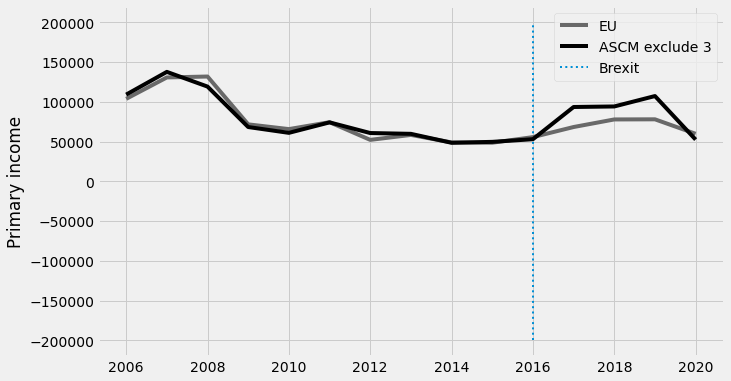

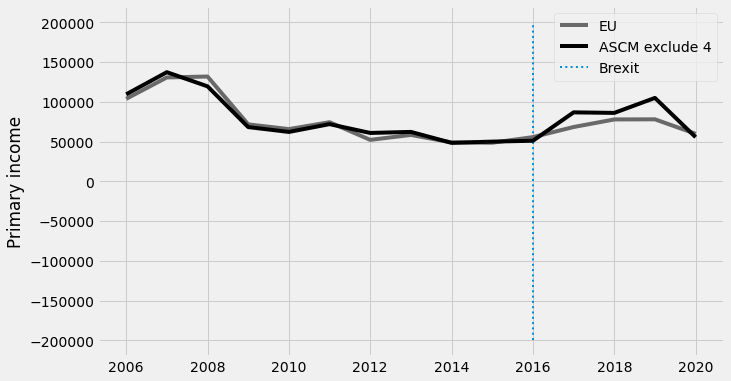

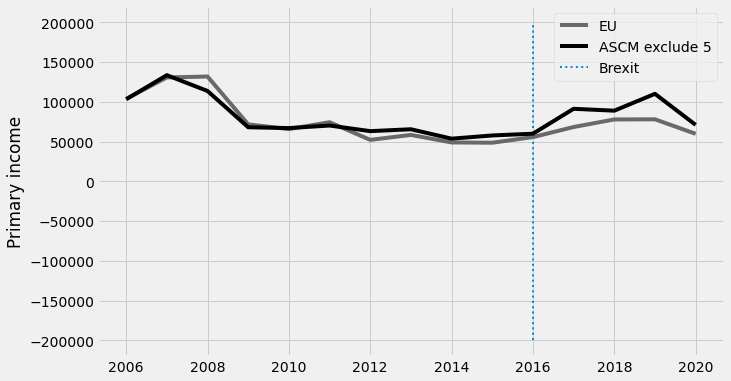

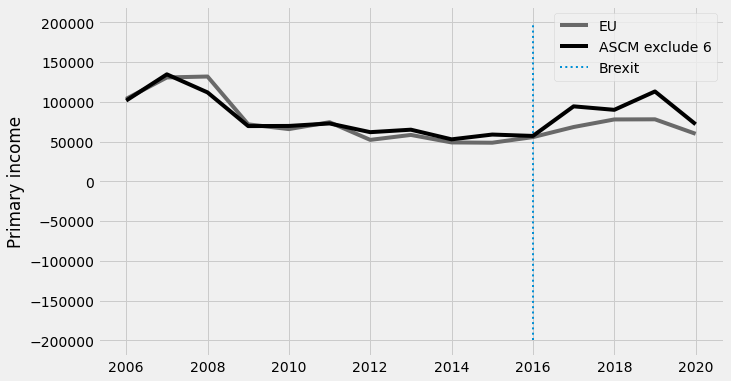

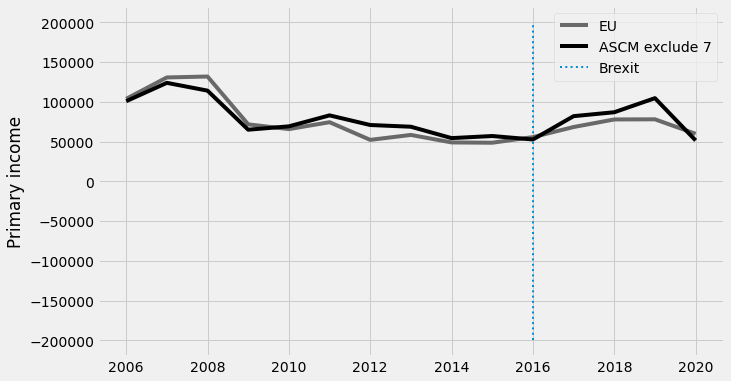

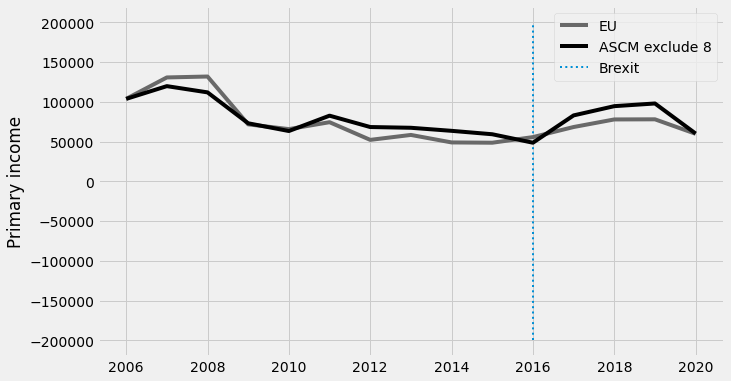

In [208]:
agumented_synthetic_control_visualize_limit_donor_pool('EU','Primary income', data_primary)


Countries: ['Brazil', 'Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [-0.6993466   0.28924164 -0.91553062  3.80241628  0.9408455  -0.86458064
 -0.65848453 -0.00935223]

Countries: ['Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [ 0.21764357 -1.05789322  3.39014604  1.3012236  -1.42184348 -0.56397816
 -0.04833621]

Countries: ['China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [-0.91501948  3.03415841  1.36183206 -1.44504905 -0.45937736 -0.05034791]

Countries: ['India', 'Japan', 'Russia', 'Switzerland', 'USA']
Weights: [ 1.67558914  0.89119208 -0.79896746 -0.38273073 -0.00407167]

Countries: ['Japan', 'Russia', 'Switzerland', 'USA']
Weights: [ 0.63020301  0.2695436  -0.32274638  0.03130105]

Countries: ['Russia', 'Switzerland', 'USA']
Weights: [ 0.34299531 -0.23139891  0.10675903]

Countries: ['Switzerland', 'USA']
Weights: [-0.19492468  0.11916456]

Countries: ['USA']
Weights: [0.08904658]


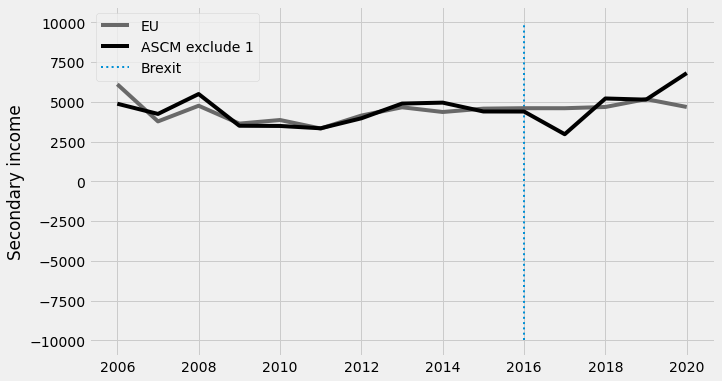

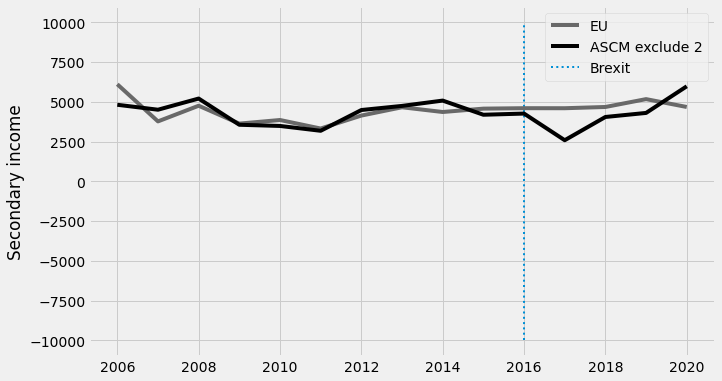

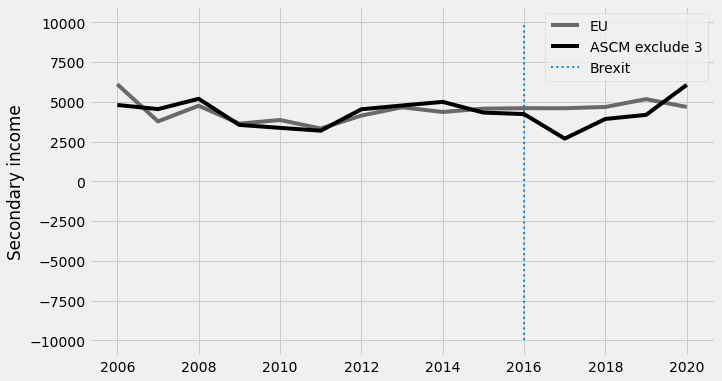

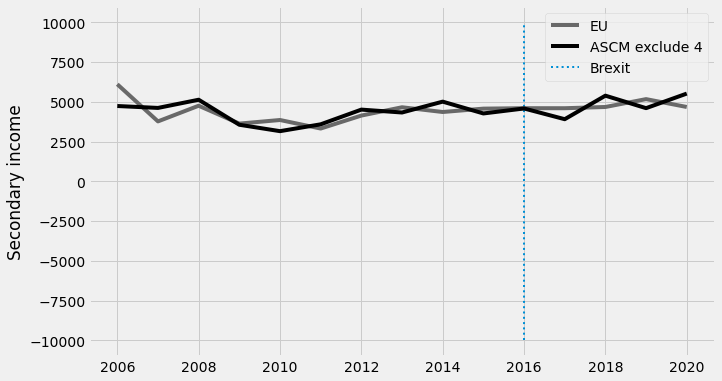

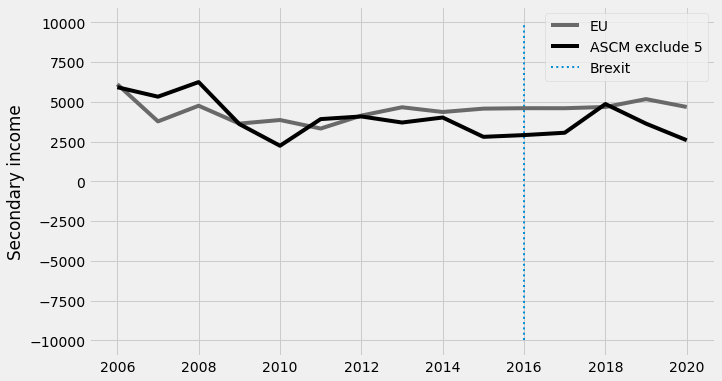

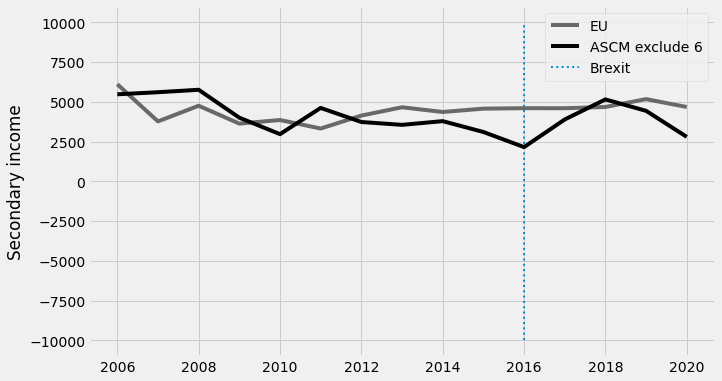

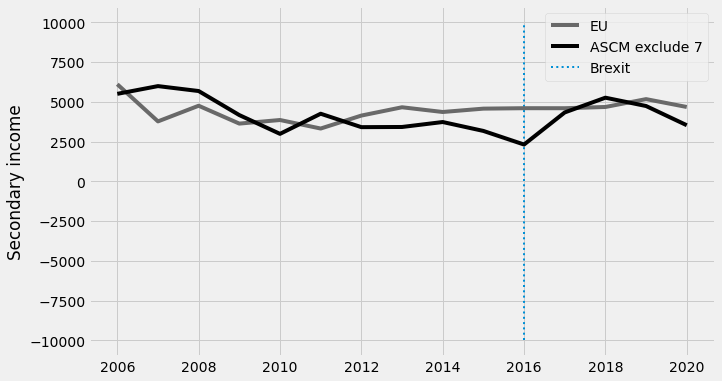

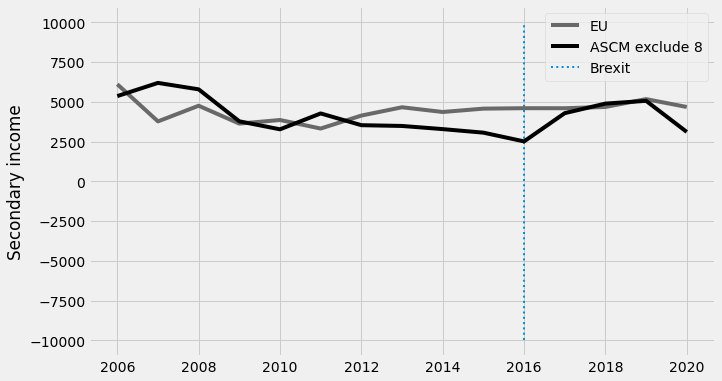

In [209]:
agumented_synthetic_control_visualize_limit_donor_pool_magnified('EU','Secondary income', data_secondary)